













# **Wide range honeypot dataset analysis**
___________________________________________________________________________________________________________________________
Researcher: **Egemen Oner - #S5636549**
___________________________________________________________________________________________________________________________
## **Introduction**

This part of the assignment will focus on achieving data analysis to identify the attackers and point out the attacks in a honeypot dataset.

The data in the json extension file named "honeypot_safe_urls_nopayload" in this directory will be used for analysis.



### The analysis will include the following:

- Identification and analysis of the attacks in the dataset.

- Identification of the geographical locations of top attackers (also victims) based on their IP addresses. 
Analysis of the distribution of attackers and victims based on countries/regions.

- Presentation of the methods used by attackers to compromise the honeypot.

- Analysis of the vulnerabilities targeted during attacks.

- A timeline of events, including when different attacks occurred and their duration including identification of patterns and trends in attack timelines.

- Strong Indicators of Compromises (IoCs) of the attacks.

- Visualisations for the above to present the findings clearly and concisely. 


___________________________________________________________________________________________________________________________
## **Tools for analysis**

To achieve all expected outputs:

- The Python programming language will be used for the whole analysis.
- Pandas library will be used for making operations on dataset (filtering, listing as table(s), and further analysis).
- Matplotlib library will be used for visualizing each finding.
- Requests library will be used for getting data from external sources (e.g. region/country data from ips), which are APIs.
- JSON library for handling data came from APIs. (Reading JSON file is conducted by read_json() function of pandas.).
- Datetime library for time analysis of the events.
___________________________________________________________________________________________________________________________

First, these libraries need to be initialized.

In [2]:
%matplotlib inline 
import pandas #----> Importing pandas for all operations on dataset
import matplotlib #----> Importing matplotlib to visualize all findings
from requests import get
from json import loads 
#----> Importing necessary functions in requests library and json for API calls and JSON convertion
from datetime import datetime
#----> Importing datetime for time analysis

print("Libraries imported.")

Libraries imported.


## 1 - Preparation

The next step is importing the recorded honeypot data here. The code below will allow us to read the JSON dataset for further operations.

After opening the file and converting it to a Pandas DataFrame, the head() function of Pandas will be used to see the first 10 data as a professional table.

In [3]:
dataToShow = 10
data_set = pandas.read_json("honeypot_safe_urls_nopayload.json", lines=True)
data_set.head(dataToShow)

,id,identification,normalised,date,channel,pattern,source,source_port,attackerIP,attackerPort,...,signature,payload_date,sensor,connection_type,local_host,local_port,connection_protocol,connection_transport,remote_host,remote_port
0,5426456e9f8c6d41306aea57,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27T05:04:46[.]363+0000,glastopf[.]events,style_css,162[.]197[.]24[.]67,60871.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,542645799f8c6d41306aea59,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27T05:04:57[.]901+0000,glastopf[.]events,unknown,162[.]197[.]24[.]67,60871.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5426457a9f8c6d41306aea5a,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27T05:04:58[.]066+0000,glastopf[.]events,style_css,162[.]197[.]24[.]67,60871.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5426457a9f8c6d41306aea5d,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27T05:04:58[.]248+0000,glastopf[.]events,unknown,162[.]197[.]24[.]67,60871.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5426462d9f8c6d41306aea5f,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27T05:07:57[.]267+0000,glastopf[.]events,unknown,173[.]174[.]71[.]56,62918.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5426463d9f8c6d41306aea61,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27T05:08:13[.]331+0000,glastopf[.]events,unknown,173[.]174[.]71[.]56,62918.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5426463d9f8c6d41306aea63,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27T05:08:13[.]535+0000,glastopf[.]events,style_css,173[.]174[.]71[.]56,62918.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5426463d9f8c6d41306aea64,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27T05:08:13[.]651+0000,glastopf[.]events,unknown,173[.]174[.]71[.]56,62918.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5426463d9f8c6d41306aea65,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27T05:08:13[.]834+0000,glastopf[.]events,unknown,173[.]174[.]71[.]56,62918.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,542646499f8c6d41306aea69,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27T05:08:25[.]021+0000,glastopf[.]events,comments,173[.]174[.]71[.]56,62918.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As can be seen in the initial data, there is no data in the columns after the Source Port column (NaN). However, since other columns are existing in this data frame already, it is obvious that the following rows will include those data.

On the other hand, some columns are not visible in the table above, which are between attackerPort and signature. Thus, all column names are unknown for now.

Additionally, the exact number of columns is 27 (as shown as 10 rows x 27 columns under the table) and the total the total number of rows (attacks) is unknown.

All columns' names and numbers of rows and columns will be determined in the following code piece:

In [6]:
print(data_set.columns)

print("\nNumber of events in dataset:", data_set.shape[0])
print("Number of columns for analysis:", data_set.shape[1])


Index(['id', 'identification', 'normalised', 'date', 'channel', 'pattern',
       'source', 'source_port', 'attackerIP', 'attackerPort', 'victimIP',
       'victimPort', 'connectionType', 'destination_ip', 'classification',
       'protocol', 'source_ip', 'signature', 'payload_date', 'sensor',
       'connection_type', 'local_host', 'local_port', 'connection_protocol',
       'connection_transport', 'remote_host', 'remote_port'],
      dtype='object')

Number of events in dataset: 994142
Number of columns for analysis: 27


The analysis is now ready with 994.142 events with 27 attributes.

Using the data in those 27 columns, a deep analysis will be made for the dataset.

____________________________________________________________________________________________________________________________________________________________

## 2- Identification and analysis of attacks (Including Methods used by the attackers & vulnerabilities targeted)

The first part will include the identification and analysis of attacks in the dataset. These may be attacks such as DDoS, brute-force, port scans, or others.


As discussed, all rows include different data, so each column that gives signals about attack type should be examined.
The below code will start to inspect the columns that may give information about attack identification, respectively. 

First part of investigation will be based on "channel" column, which includes channels that captures the attacks.

In [5]:
data_set.channel.value_counts()

channel
dionaea[.]connections    575180
amun[.]events            371317
snort[.]alerts            40446
glastopf[.]events          7199
Name: count, dtype: int64

As can be seen in the output, attacks are caught by four different channels. These are:

- **Dionaea:** Malware capturing honeypot
- **Amun:** Low-interaction worm infection honeypot (Malware capturing can be said)

*However, attacks that Amun and Dionaea captured is not always indicating a malware. They will called as "other attacks" for now since there are not identified yet.*

- **Snort:** Network intrusion detection system to log and analyze network traffic in real-time, looking for signatures of known attacks and generating alerts for suspicious activities
- **Glastopf:** A web application honeypot designed to emulate vulnerabilities in web applications to attract attacks such as SQL injection, Remote File Inclusion (RFI), and Local File Inclusion (LFI), and Style_css.

*Attacks captured by Snort can be called as "Network Attacks", and others captured by Glastopf can be called as "Web Application Attacks".*


In [7]:
snort = data_set['channel'].value_counts()['snort[.]alerts']
print("Number of network attacks:", snort, " ( ", "{:.2f}".format(snort*100/data_set.shape[0]),"%)")
glastopf = data_set['channel'].value_counts()['glastopf[.]events']
print("Number of web application attacks:", glastopf, " ( ", "{:.2f}".format(glastopf*100/data_set.shape[0]),"%)")
other = data_set['channel'].value_counts()['dionaea[.]connections'] + data_set['channel'].value_counts()['amun[.]events']
print("Number of other attacks:", other, " ( ", "{:.2f}".format(other*100/data_set.shape[0]),"%)")

Number of network attacks: 40446  (  4.07 %)
Number of web application attacks: 7199  (  0.72 %)
Number of other attacks: 946497  (  95.21 %)


***"Other attacks" are constituting the majority of attacks.***

For **Snort-captured** attacks, according to the definition, signature column is the best to be examined.

In [10]:
data_set.signature.value_counts()
#data_set.signature[data_set.channel == "snort[.]alerts"].value_counts()

#Both codes above are giving the same output, this means that all attacks with signatures are captured by Snort."

signature
BAD-TRAFFIC same SRC/DST                                                                            29418
ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited      9221
ET POLICY Unusual number of DNS No Such Name Responses                                               1488
ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited       248
ET POLICY Unusual number of DNS No Such Name Responses                                                 47
ICMP Destination Unreachable Communication Administratively Prohibited                                 11
COMMUNITY SIP TCP/IP message flooding directed to SIP proxy                                             3
ET DOS Possible NTP DDoS Inbound Frequent Un-Authed MON_LIST Requests IMPL 0x03                         3
ICMP Destination Unreachable Communication Administratively Prohibited                                  3
GPL VOIP SIP INVITE message flooding

These signatures captured by **Snort**, have different meanings. At this stage, these signatures will be commented on.

- **BAD-TRAFFIC same SRC/DST:** Indicating that the source and destination IP addresses are the same, which can be referred as *spoofing attack.*

- **ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited:** Often related to a host or network firewall blocking traffic, could be part of a *reconnaissance attempt* where the attacker is mapping out network defenses.

- **ET POLICY Unusual number of DNS No Such Name Responses:** May an indicator of *dns tunneling/recon*.

- **ICMP Destination Unreachable Communication Administratively Prohibited:** May an indicator of *reconnaissance attempt.*

- **COMMUNITY SIP TCP/IP message flooding directed to SIP proxy:** This is indicative of a flood attack, which is a type of *Denial-of-Service (DoS) attack*, aimed at overwhelming a SIP proxy with traffic.

- **ET DOS Possible NTP DDoS Inbound Frequent Un-Authed MON_LIST Requests IMPL 0x03:** This signature suggests a potential NTP amplification attack, a form of *Distributed Denial-of-Service (DDoS)* where the attacker exploits publically accessible NTP servers to overwhelm a target with UDP traffic.

- **GPL VOIP SIP INVITE message flooding:** This also points to a *DoS* attack, specifically targeting VOIP services by sending an excessive number of SIP INVITE requests to a server, attempting to overwhelm it.

- **ET DOS Possible NTP DDoS Inbound Frequent Un-Authed MON_LIST Requests IMPL 0x02:** Much like the other NTP-related signature, this also indicates a potential NTP *DDoS attack* but with a different implementation signature.

According to these information, a temporary dataframe can be created as:

In [11]:
#signature
#BAD-TRAFFIC same SRC/DST                                                                            29418
#ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited      9221
#ET POLICY Unusual number of DNS No Such Name Responses                                               1488
#ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited       248
#ET POLICY Unusual number of DNS No Such Name Responses                                                 47
#ICMP Destination Unreachable Communication Administratively Prohibited                                 11
#COMMUNITY SIP TCP/IP message flooding directed to SIP proxy                                             3
#ET DOS Possible NTP DDoS Inbound Frequent Un-Authed MON_LIST Requests IMPL 0x03                         3
#ICMP Destination Unreachable Communication Administratively Prohibited                                  3
#GPL VOIP SIP INVITE message flooding                                                                    3
#ET DOS Possible NTP DDoS Inbound Frequent Un-Authed MON_LIST Requests IMPL 0x02                         1

#Respectively:
attacks= pandas.Series(["Spoofing","Reconnaissance/Probing","DNS Tunneling/Reconnaissance","Reconnaissance/Probing","DNS Tunneling/Reconnaissance","Reconnaissance/Probing","SIP Flood (DoS)","NTP Amplification DDoS","Reconnaissance/Probing","SIP Flood (DoS)","NTP Amplification DDoS"])
combined_network_df = pandas.DataFrame({'count': data_set.signature.value_counts(), 'Attack': attacks.values})
combined_network_df

,count,Attack
signature,,
BAD-TRAFFIC same SRC/DST,29418,Spoofing
ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited,9221,Reconnaissance/Probing
ET POLICY Unusual number of DNS No Such Name Responses,1488,DNS Tunneling/Reconnaissance
ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited,248,Reconnaissance/Probing
ET POLICY Unusual number of DNS No Such Name Responses,47,DNS Tunneling/Reconnaissance
ICMP Destination Unreachable Communication Administratively Prohibited,11,Reconnaissance/Probing
COMMUNITY SIP TCP/IP message flooding directed to SIP proxy,3,SIP Flood (DoS)
ET DOS Possible NTP DDoS Inbound Frequent Un-Authed MON_LIST Requests IMPL 0x03,3,NTP Amplification DDoS
ICMP Destination Unreachable Communication Administratively Prohibited,3,Reconnaissance/Probing


The code snippet below stores these counts in variables. These will be used later in the analysis.

In [12]:
spoofing = combined_network_df.groupby('Attack')['count'].sum()['Spoofing']
print("Number of spoofing attacks:" , spoofing)

reconProb = combined_network_df.groupby('Attack')['count'].sum()['Reconnaissance/Probing']
print("Number of Reconnaissance/Probing attempts:" , reconProb)

dnsTunnelRecon = combined_network_df.groupby('Attack')['count'].sum()['DNS Tunneling/Reconnaissance']
print("Number of DNS Tunneling/Reconnaissance attempts:" , dnsTunnelRecon)

dos = combined_network_df.groupby('Attack')['count'].sum()['SIP Flood (DoS)']
print("Number of DoS Attacks:" , dos)

ddos = combined_network_df.groupby('Attack')['count'].sum()['NTP Amplification DDoS']
print("Number of DDoS Attacks:" , ddos)

network = ddos + dos + dnsTunnelRecon + reconProb + spoofing

print("Number of network attacks:", network, "(is equal to snort-captured attacks)" if network == snort else "not equal. ERROR.")

Number of spoofing attacks: 29418
Number of Reconnaissance/Probing attempts: 9483
Number of DNS Tunneling/Reconnaissance attempts: 1535
Number of DoS Attacks: 6
Number of DDoS Attacks: 4
Number of network attacks: 40446 (is equal to snort-captured attacks)


These results are also classified by classification column. Below code gives the value counts of classification types, which can be classified by the above output.

In [14]:
data_set.classification.value_counts()

classification
Potentially Bad Traffic        30953
Misc activity                   9483
Attempted Denial of Service       10
Name: count, dtype: int64

As can be seen, 
- **Attempted Denial of Service is 10, including DoS and DDoS attempts.** 
- **Misc activity consists of Recon/Probing attempts** 
- **Sum of the spoofing and dns tunneling are classified as "potentially bad traffic".**

Reconnaissance/Probing and DNS Tunneling/Reconnaissance attempts are including these:

- Port Scan
- Network Mapping
- Vulnerability Scanning
- DNS Scanning

Then, events are captured by glastopf will be examined. 

For verification, it should be tested that when the number of attacks identified so far is subtracted from the total attacks, only the number of glastopf attacks remains.

In [15]:
sum = other + network
print("Remaining:" , data_set.shape[0] - sum)

print(data_set.shape[0] - sum == data_set['channel'].value_counts()['glastopf[.]events'])

Remaining: 7199
True


The output is *True*. So, after identifying the attacks that captured by glastopf, it means that every single attack (except "other attacks") has been identified.

The "pattern" column is specific for glastopf honeypot that can be seen on below code. These patterns are web attack types that will be inspected.

In [16]:
#print(data_set.pattern[data_set.channel == "glastopf[.]events"].value_counts())
#print(data_set.pattern.value_counts())

#Both codes above are giving the same output, this means that all attacks with patterns are captured by Glastopf honeypot."

webAttacks = data_set['channel'].value_counts()['glastopf[.]events']
print("Web attacks = ", webAttacks)

sum += webAttacks

print("Total number of attacks = ", sum) 
print(sum == data_set.shape[0])


Web attacks =  7199
Total number of attacks =  994142
True


With all information, a general overview for attacks is visualized in below.

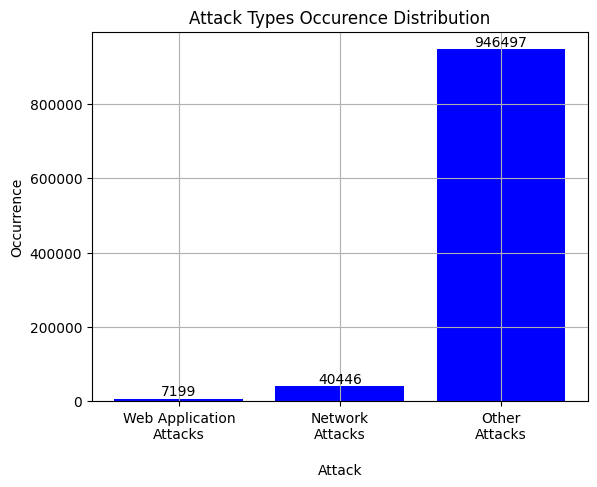

In [18]:
values = [webAttacks, network, other]
labels = ['Web Application\nAttacks\n', 'Network\nAttacks\n',  'Other\nAttacks\n', ]

bars = matplotlib.pyplot.bar(labels, values, color='b')

for bar in bars:
    yval = bar.get_height()
    matplotlib.pyplot.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

matplotlib.pyplot.xlabel('Attack')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.ylabel('Occurrence')
matplotlib.pyplot.title('Attack Types Occurence Distribution')
matplotlib.pyplot.show()

To continue, specific visualized analysis for each attack type will be conducted below.

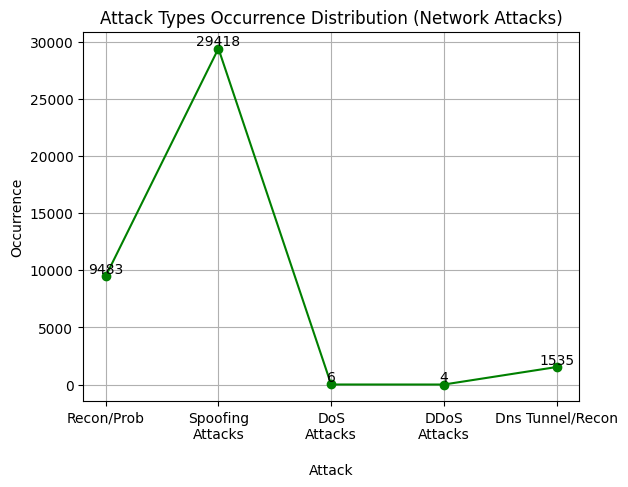

In [19]:
##Network Attacks 

values = [ reconProb, spoofing, dos, ddos, dnsTunnelRecon]
labels = ['Recon/Prob\n', 'Spoofing\nAttacks\n', 'DoS\nAttacks\n', 'DDoS\nAttacks\n', 'Dns Tunnel/Recon\n',]
matplotlib.pyplot.plot(labels, values, marker='o', linestyle='-', color='g')

for i, v in enumerate(values):
    matplotlib.pyplot.text(labels[i], v, str(v), ha='center', va='bottom')

matplotlib.pyplot.xlabel('Attack')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.ylabel('Occurrence')
matplotlib.pyplot.title('Attack Types Occurrence Distribution (Network Attacks)')
matplotlib.pyplot.show()


### Protocols of network attacks

Protocol distribution of network attacks can be inspected below:

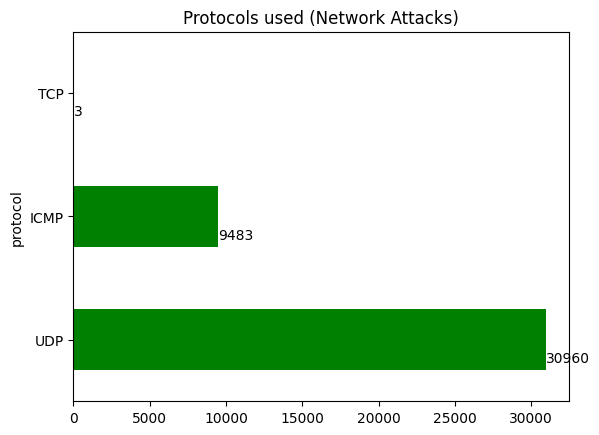

Number of network attacks are equal to sum of protocol occurences: True


In [21]:
#Protocol column is belong to network attacks (captured by Snort)
matplotlib.pyplot.title('Protocols used (Network Attacks)')
ax = data_set.protocol.value_counts().plot.barh(color='green')

for i in ax.patches:
    ax.text(i.get_width()+.1, i.get_y()+.1, str(i.get_width()), va='center')

matplotlib.pyplot.show()
print ("Number of network attacks are equal to sum of protocol occurences:", network == data_set.protocol.value_counts().sum())


For web attacks (which are captured by glastopf), only "pattern", "source" and "source_port" columns are existing, others are NaN.

(Except: **id, identification, normalised, date, and channel columns.** These are common columns for every attack.)

It can be checked by below code:

In [24]:
print(data_set.pattern[data_set.channel != "glastopf[.]events"].value_counts().empty)
print(data_set.source[data_set.channel != "glastopf[.]events"].value_counts().empty)
print(data_set.source_port[data_set.channel != "glastopf[.]events"].value_counts().empty)

#Any other column gives the output: "False"
#Example: print(data_set.***AnyOtherColumnName***[data_set.channel != "glastopf[.]events"].value_counts().empty)

True
True
True


In line with this information, types of methods used for web attacks will be handled. In order to achieve this, "pattern" column will be used.

In [25]:
print(data_set['pattern'].value_counts())

pattern
unknown           5782
head               836
tomcat_manager     467
login               63
robots              15
style_css           10
lfi                  6
phpinfo              6
phpmyadmin           6
rfi                  5
comments             1
file_server          1
sqli                 1
Name: count, dtype: int64


The methods that attackers used to compromise the glastopf honeypot are pointed as short names. Below code will make it as a more readable table with their number of occurences.

In [28]:
#Respectively,
wAttacks = pandas.Series(["Unknown Pattern","HTTP HEAD","Targeting Tomcat Application Manager","Brute Force Attempts","Targeting robots.txt","Targeting CSS Files","Local File Inclusion","Targeting PHP files","Targeting web-based MySQL database management","Remote File Inclusion","Attacks for Comments", "Targeting File Server Services", "SQL Injection"])
combined_web_df = pandas.DataFrame({'count': data_set.pattern.value_counts(), 'Attack': wAttacks.values})
combined_web_df

,count,Attack
pattern,,
unknown,5782,Unknown Pattern
head,836,HTTP HEAD
tomcat_manager,467,Targeting Tomcat Application Manager
login,63,Brute Force Attempts
robots,15,Targeting robots.txt
style_css,10,Targeting CSS Files
lfi,6,Local File Inclusion
phpinfo,6,Targeting PHP files
phpmyadmin,6,Targeting web-based MySQL database management


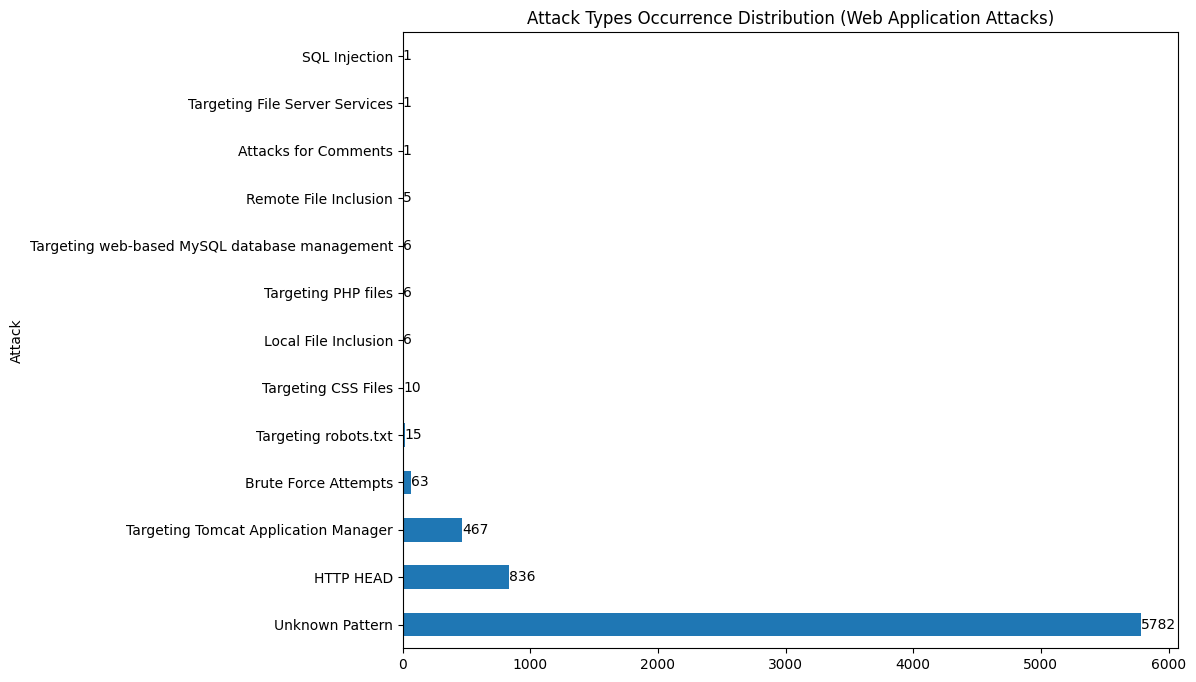

In [29]:
#Visualization

matplotlib.pyplot.title('Attack Types Occurrence Distribution (Web Application Attacks)')
plot_data = combined_web_df.set_index('Attack')['count']
ax = plot_data.plot(kind='barh', figsize=(10, 8))

for index, value in enumerate(plot_data):
    matplotlib.pyplot.text(value, index, str(value), va='center')

matplotlib.pyplot.show()

To continue with the other attacks' inspection, attacks should be handled in 2 ways:

- Attacks captured by Dionaea
- Attacks captured by Amun

Their difference is they are including different columns, which are:

- **Dionaea-captured attacks:** Remote Port, Remote Host, Connection Protocol, Connection Transport, Local Port, Local Host, connection_type. 

- **Amun-captured attacks:** AttackerIP, AttackerPort, VictimIP, VictimPort, connectionType.

Firstly, for Amun-captured attacks, they are inspected in only one attribute, which is connectionType. No other data has provided. Below code analyzes the connectionType attribute:

In [25]:
print(data_set.connectionType[data_set.channel != "amun[.]events"].value_counts().empty)
# As can be seen (output: true), no other channel has connectionType attribute.

print(data_set['connectionType'].value_counts())


True
connectionType
initial    366765
exploit      4552
Name: count, dtype: int64


As can be seen, there are only 2 data for Amun-captured attacks' connection type.

**initial:** This refers to initial connection attempts. These are likely the first step in the communication process, possibly indicating new, unestablished connections that were initiated.

**exploit:** This refers to connections that are part of or are an actual exploit attempt. These could be connections where the system identified the attempt as malicious, typically involving attempts to take advantage of vulnerabilities in the system to gain unauthorized access or cause other harm.

Their distribution is given below:

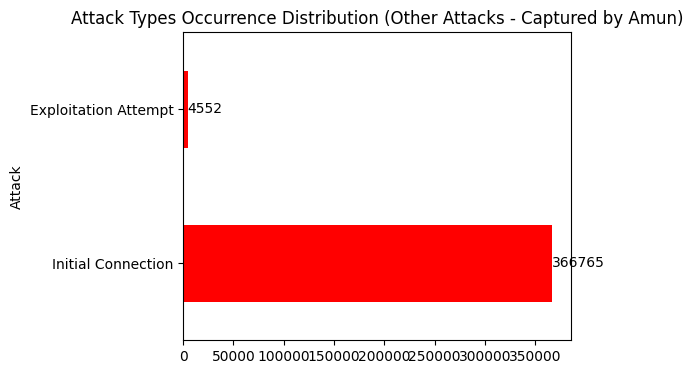

In [30]:
#Visualization
oAttacks1 = pandas.Series(["Initial Connection", "Exploitation Attempt"])
combined_amundf = pandas.DataFrame({'count': data_set.connectionType.value_counts(), 'Attack': oAttacks1.values})

init = combined_amundf.groupby('Attack')['count'].sum()['Initial Connection']
exploitation = combined_amundf.groupby('Attack')['count'].sum()['Exploitation Attempt']

matplotlib.pyplot.title('Attack Types Occurrence Distribution (Other Attacks - Captured by Amun)')
plot_data = combined_amundf.set_index('Attack')['count']
ax = plot_data.plot(kind='barh', figsize=(5, 4), color= "r")

for index, value in enumerate(plot_data):
    matplotlib.pyplot.text(value, index, str(value), va='center')

matplotlib.pyplot.show()

Secondly, for Dianoea-captured attacks, they are inspected via connection protocol attribute to identify the attacks.

In [31]:
print(data_set.connection_protocol[data_set.channel != "dionaea[.]connections"].value_counts().empty)
# As can be seen (output: true), no other channel has this attribute.

print(data_set.connection_protocol.value_counts())


True
connection_protocol
pcap                 437210
SipSession            68743
SipCall               42612
mysqld                14415
mssqld                 5013
RtpUdpStream           2833
smbd                   2700
ftpd                    830
epmapper                410
TftpServerHandler       232
ftpdatalisten           103
mirrorc                  27
mirrord                  27
emulation                23
remoteshell               2
Name: count, dtype: int64


Based on these protocols, suggested attacks might be:

- **pcap:** Packet capture files might indicate sniffing attacks where an attacker captures packets to analyze and extract sensitive information.

- **SipSession:** Could indicate VoIP-related attacks, such as session hijacking, where an attacker takes control of a SIP session to eavesdrop or conduct toll fraud.

- **SipCall:** Similar to SipSession, it could be related to VoIP fraud or interception, attempting unauthorized calls or exploitation of SIP call handling.

- **mysqld:** Could be SQL injection attacks aimed at the MySQL service to manipulate databases, extract data, or gain unauthorized access.

- **mssqld:** Similar to mysqld, this could indicate SQL injection attacks targeting Microsoft SQL Server services.

- **RtpUdpStream:** Might relate to eavesdropping or hijacking RTP streams in an attempt to capture unencrypted media streams.

- **smbd:** Likely refers to attempts to exploit vulnerabilities in the SMB protocol, such as EternalBlue used in the WannaCry ransomware attack, or unauthorized access attempts.

- **ftpd:** Could represent brute force or credential stuffing attacks to gain unauthorized access to FTP servers or directory traversal attempts.

- **epmapper:** Might indicate attempts to exploit the DCE/RPC endpoint mapper, which could be used to conduct denial-of-service attacks or unauthorized access.

- **TftpServerHandler:** May be indicative of attacks exploiting TFTP's lack of authentication to replace system files or deploy malware.

- **ftpdatalisten:** Could be related to exploits against the FTP protocol during the data transfer phase, possibly to retrieve or manipulate files.

- **mirrorc and mirrord:** May indicate attempts to manipulate or compromise replication and mirroring services, potentially to spread malware or disrupt synchronization.

- **emulation:** Could refer to various attack types depending on what service or protocol is being emulated, often for reconnaissance or exploitation.

- **remoteshell:** Likely indicates shell injection or remote command execution attempts, often associated with gaining unauthorized access or executing arbitrary commands.



In [28]:
#According to these information,

##connection_protocol
#pcap                 437210
#SipSession            68743
#SipCall               42612
#mysqld                14415
#mssqld                 5013
#RtpUdpStream           2833
#smbd                   2700
#ftpd                    830
#epmapper                410
#TftpServerHandler       232
#ftpdatalisten           103
#mirrorc                  27
#mirrord                  27
#emulation                23
#remoteshell               2

#respectively:
oAttacks2= pandas.Series(["Sniffing", "Session Hijacking", "Exploitation of SIP CALL", "MySQL Injection", "MSSQL Injection", "Hijacking RTP Streams", "Exploiting SMB Protocol", "Unauthorized Access to FTP Servers", "Exploiting DCE/RPC Endpoint Mapper", "Exploiting TFTP", "Exploiting FTP during data transfer", "Manipulation of mirrorc", "Manipulation of mirrord","Emulation", "Shell Injection"])
combined_dion_df = pandas.DataFrame({'count': data_set.connection_protocol.value_counts(), 'Attack': oAttacks2.values})
combined_dion_df

,count,Attack
connection_protocol,,
pcap,437210,Sniffing
SipSession,68743,Session Hijacking
SipCall,42612,Exploitation of SIP CALL
mysqld,14415,MySQL Injection
mssqld,5013,MSSQL Injection
RtpUdpStream,2833,Hijacking RTP Streams
smbd,2700,Exploiting SMB Protocol
ftpd,830,Unauthorized Access to FTP Servers
epmapper,410,Exploiting DCE/RPC Endpoint Mapper


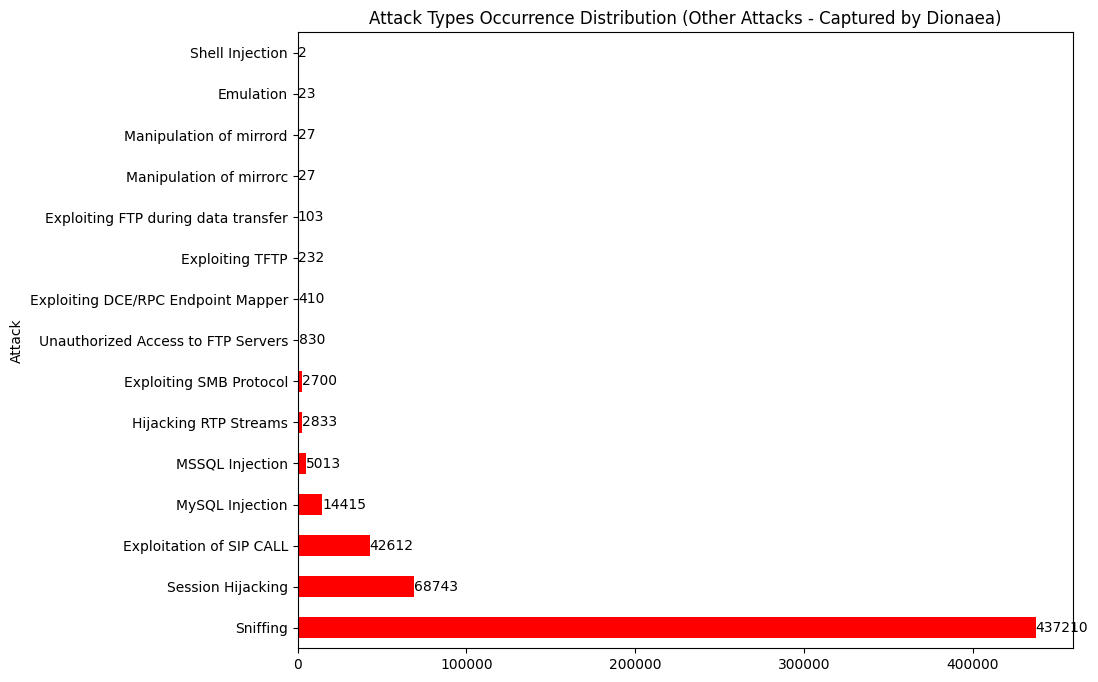

In [29]:
#Visualization
matplotlib.pyplot.title('Attack Types Occurrence Distribution (Other Attacks - Captured by Dionaea)')
plot_data = combined_dion_df.set_index('Attack')['count']
ax = plot_data.plot(kind='barh', figsize=(10, 8), color= "r")

for index, value in enumerate(plot_data):
    matplotlib.pyplot.text(value, index, str(value), va='center')

matplotlib.pyplot.show()

Overall, this section commentates and identifies all attacks in the dataset by dividing honeypots and sub-components. In following section, based on all these attacks, most frequent regions of attackers will be analyzed.

____________________________________________________________________________________________________________________________________________________________

## 3- Geographical locations of top attackers

To continue with the investigation, geographical locations of the attackers that oftenly occured in dataset will be analyzed based on their IP addresses. This covers the distribution of top 20 frequent attackerIps based on their regions. To get their locations via IP addresses, Ip&Location API will be used.

Firstly, let us get the number of different attackerIps and number of attacks that owning a source/attackerIP on the log file. 

In order to achieve it, firstly, attackerIP,source,source_ip and remote_host columns should be combined as one and checking for the numbers.



In [36]:
#Combine SOURCE,ATTACKERIP, ROUTE_HOST, and SOURCE_IP columns because that all columns are illustrating the attacker's IP address depending on the type of attack.

numberOfAttacksWithAttackerIPSet = data_set['attackerIP'].value_counts() # For AMUN channel attacks (Other)
numberOfAttacksWithSourcesSet = data_set['source'].value_counts() # For GLASTOPF channel attacks (Web)
numberOfAttacksWithSourcesSet_2 = data_set['source_ip'].value_counts() # For SNORT channel attacks (Network)
numberOfAttacksWithSourcesSet_3 = data_set['remote_host'].value_counts() # For DIONAEA channel attacks (Other)

numberOfAttacksSetWithIps = numberOfAttacksWithAttackerIPSet.add(numberOfAttacksWithSourcesSet, fill_value=0)
numberOfAttacksSetWithIps = numberOfAttacksSetWithIps.add(numberOfAttacksWithSourcesSet_2, fill_value=0)
numberOfAttacksSetWithIps = numberOfAttacksSetWithIps.add(numberOfAttacksWithSourcesSet_3, fill_value=0)


numberOfAttacksSetWithIps = numberOfAttacksSetWithIps.sort_values(ascending=False)
totalNumberOfAttackerIPOccs = numberOfAttacksSetWithIps.sum() # ----> All attacks will be listed in this variable. It should be equal to the total number of rows, since each attack has an attacker.
totalNumberOfDifferentAttackerIPs = numberOfAttacksSetWithIps.__len__()



print("Number of attacks that including source/attackerIP: ", totalNumberOfAttackerIPOccs, "" if totalNumberOfAttackerIPOccs != data_set.shape[0] else "(equal to number of total attacks)")
print("Number of different attacker source Ips: ", totalNumberOfDifferentAttackerIPs)
print("-------")
print(numberOfAttacksSetWithIps.head(20))

Number of attacks that including source/attackerIP:  994142.0 (equal to number of total attacks)
Number of different attacker source Ips:  185936
-------
163[.]172[.]67[.]30            72025.0
162[.]254[.]205[.]73           50569.0
61[.]153[.]106[.]24            50212.0
::ffff:185[.]40[.]4[.]65       30318.0
0[.]0[.]0[.]0                  29418.0
::ffff:5[.]152[.]222[.]194     13587.0
66[.]191[.]136[.]146           12156.0
71[.]190[.]176[.]162            9518.0
5[.]152[.]216[.]226             8283.0
::ffff:85[.]25[.]207[.]170      7636.0
61[.]160[.]213[.]32             7618.0
58[.]218[.]204[.]225            7612.0
::ffff:88[.]150[.]252[.]176     7498.0
198[.]101[.]193[.]22            6696.0
74[.]91[.]25[.]122              6388.0
83[.]136[.]86[.]188             5456.0
1[.]34[.]22[.]39                5369.0
194[.]63[.]142[.]218            5125.0
61[.]219[.]142[.]11             4730.0
165[.]225[.]157[.]188           4700.0
Name: count, dtype: float64


----> As seen in the output above, there are 185.936 different attacker IP addresses, and sum of them are equal to the total number of attack data.

It will be analyzed that which regions the majority of these (Top 20) come from.

The regions of the first 20 IP addresses will be determined via an API call and compared as a percentage with the total number of attacks.

In [37]:
percentagesOfCountries = {}
i = 0


print("Total attacks:" , totalNumberOfAttackerIPOccs)
print("\nTop 20 attacker regions:\n")

#The region of each IP address should be determined (by an API call).
for ipAddress, count in numberOfAttacksSetWithIps.head(20).items():
    if pandas.notnull(count):
        ipAddress = ipAddress.replace("::ffff:", "")
        ipAddress = ipAddress.replace("[", "")
        ipAddress = ipAddress.replace("]", "")
        url="https://api.iplocation.net/?ip="+ipAddress # ----> Putting ipAddress as endpoint of our API url
        response = get(url)
        responseAsJSON = loads(response.text) 
        try:
            country = responseAsJSON['country'] #---> This gives as the exact country of the IP address.
            region = responseAsJSON['regionName']
        except Exception:
            country = "Null"
            region = "Null"
        strn = country + " (" + region + ")"
        percentageOfAttempts = 100 * numberOfAttacksSetWithIps.iloc[i] / totalNumberOfAttackerIPOccs
        percentageLabel = "{:.2f}".format(percentageOfAttempts) + "%"
        if country not in percentagesOfCountries.keys() and country != "Null":
            percentagesOfCountries[country] = numberOfAttacksSetWithIps.iloc[i]
        elif country in percentagesOfCountries.keys() and country != "Null":
            percentagesOfCountries[country] += numberOfAttacksSetWithIps.iloc[i]
        print(i+1, "-", ipAddress, " : ", numberOfAttacksSetWithIps.iloc[i], " of ", totalNumberOfAttackerIPOccs, " (" , percentageLabel, ") - ", strn)
        i+=1

Total attacks: 994142.0

Top 20 attacker regions:

1 - 163.172.67.30  :  72025.0  of  994142.0  ( 7.24% ) -  France (Île-de-France)
2 - 162.254.205.73  :  50569.0  of  994142.0  ( 5.09% ) -  United States (Florida)
3 - 61.153.106.24  :  50212.0  of  994142.0  ( 5.05% ) -  China (Zhejiang)
4 - 185.40.4.65  :  30318.0  of  994142.0  ( 3.05% ) -  United States (Missouri)
5 - 0.0.0.0  :  29418.0  of  994142.0  ( 2.96% ) -  Null (Null)
6 - 5.152.222.194  :  13587.0  of  994142.0  ( 1.37% ) -  United Kingdom (England)
7 - 66.191.136.146  :  12156.0  of  994142.0  ( 1.22% ) -  United States (Minnesota)
8 - 71.190.176.162  :  9518.0  of  994142.0  ( 0.96% ) -  United States (New York)
9 - 5.152.216.226  :  8283.0  of  994142.0  ( 0.83% ) -  United Kingdom (England)
10 - 85.25.207.170  :  7636.0  of  994142.0  ( 0.77% ) -  France (Grand Est)
11 - 61.160.213.32  :  7618.0  of  994142.0  ( 0.77% ) -  China (Jiangsu)
12 - 58.218.204.225  :  7612.0  of  994142.0  ( 0.77% ) -  China (Jiangsu)
13 - 8

If these results are distributed into countries only, it can be better examined the distribution of attacks across countries. Below line chart demonstrates the distribution of top frequent attacks into countries instead of regions.

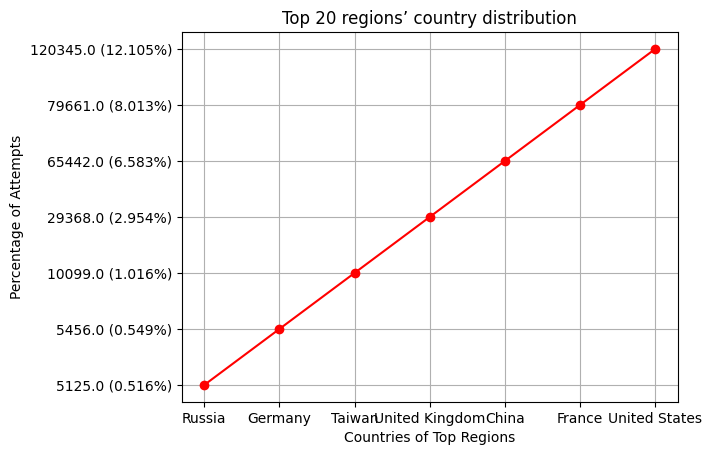

In [40]:
#Get dictionary elements as list
percentagesOfCountries = dict(sorted(percentagesOfCountries.items(), key=lambda item: item[1], reverse=True))
countryCodes = list(percentagesOfCountries.keys())
attempts = list(percentagesOfCountries.values())
countryPercentages = []
countryAttempts = []

#Get percentages for each country
for i in attempts:
    percentage = 100 * i / totalNumberOfAttackerIPOccs
    countryPercentages.append(percentage)
    countryAttempts.append(i)
    
# Sort the lists for any case
countryAttempts.sort(reverse=True)
countryPercentages.sort(reverse =True)

#Unite them as one
countryAttemptsAndPercentages = []

for i in range(min(len(countryAttempts), len(countryPercentages))):
    countryAttemptAndPercentage = str(countryAttempts[i]) + " (" + "{:.3f}".format(countryPercentages[i]) + "%)"
    countryAttemptsAndPercentages.append(countryAttemptAndPercentage)

matplotlib.pyplot.plot(countryCodes, countryAttemptsAndPercentages, marker='o', linestyle='-', color='r')
matplotlib.pyplot.title("Top 20 regions’ country distribution")
matplotlib.pyplot.xlabel("Countries of Top Regions")
matplotlib.pyplot.ylabel("Percentage of Attempts")
matplotlib.pyplot.grid(True)
matplotlib.pyplot.gca().invert_yaxis()
matplotlib.pyplot.gca().invert_xaxis()
matplotlib.pyplot.show()

It is seen that the attackers who carried out the majority of the attacks were distributed in 7 countries, especially different regions in France and the United States.

In region basis, **France** is the leader, while **US** is the leader in country distribution.

For verification, the sum of attempts in **region analysis** can be taken manually.

Next section will be about time analysis of the attacks.

____________________________________________________________________________________________________________________________________________________________
## 4- Timeline of events, including when different attacks occurred and their duration including identification of patterns and trends in attack timelines


This section will focus on time analysis of the events identified above. In order to succeed it, "date" column, which is common for all attacks, will be considered.

Firstly, from beginning to end, all attacks conducted between:

In [49]:
firstAttack = datetime.strptime(data_set.iloc[0].date[:10], "%Y-%m-%d")
print("First attack in dataset conducted on:", firstAttack)
 
lastAttack = datetime.strptime(data_set.iloc[data_set.shape[0] - 1].date[:10], "%Y-%m-%d")
print("Last attack in dataset conducted on:", lastAttack)

print("All attacks conducted in:", lastAttack - firstAttack)


First attack in dataset conducted on: 2014-09-27 00:00:00
Last attack in dataset conducted on: 2017-02-28 00:00:00
All attacks conducted in: 885 days, 0:00:00


As can be seen, all attacks occured in **885 days**, between 27 September 2014 and 28 February 2017.

In these 885 days, identified attacks occured in different timelines. Now, channel distribution for each year will be checked first:

In [50]:
print("Attacks in 2014 Captured From:")
print(data_set['channel'][(data_set['date'].str[:4] == '2014')].value_counts())
print("\nAttacks in 2015 Captured From:")
print(data_set['channel'][(data_set['date'].str[:4] == '2015')].value_counts())
print("\nAttacks in 2016 Captured From:")
print(data_set['channel'][(data_set['date'].str[:4] == '2016')].value_counts())
print("\nAttacks in 2017 Captured From:")
print(data_set['channel'][(data_set['date'].str[:4] == '2017')].value_counts())

Attacks in 2014 Captured From:
channel
amun[.]events        153430
glastopf[.]events      2206
snort[.]alerts          306
Name: count, dtype: int64

Attacks in 2015 Captured From:
channel
amun[.]events            217887
dionaea[.]connections    163917
glastopf[.]events          4993
snort[.]alerts             2105
Name: count, dtype: int64

Attacks in 2016 Captured From:
channel
dionaea[.]connections    291755
snort[.]alerts            38034
Name: count, dtype: int64

Attacks in 2017 Captured From:
channel
dionaea[.]connections    119508
snort[.]alerts                1
Name: count, dtype: int64


To start with, attacks occured in 2014 (September 27 to December 31) will be inspected.
There is no attack captured by Dionaea in 2014. Others are analyzed below:



In [51]:
print("----2014----")
print("\nAmun-captured attacks in 2014")
print(data_set['connectionType'][(data_set['date'].str[:4] == '2014') & (data_set['channel'] == 'amun[.]events')].value_counts())
#As can be remembered from attack identification, amun events only have connectionType.
print("\nNetwork attacks in 2014")
print(data_set['signature'][(data_set['date'].str[:4] == '2014') & (data_set['channel'] == 'snort[.]alerts')].value_counts())
#As can be remembered from attack identification, snort alerts are analyzed by their signatures.
print("\nWeb app. attacks in 2014")
print(data_set['pattern'][(data_set['date'].str[:4] == '2014') & (data_set['channel'] == 'glastopf[.]events')].value_counts())
#As can be remembered from attack identification, glastopf events are analyzed by their patterns.

----2014----

Amun-captured attacks in 2014
connectionType
initial    152571
exploit       859
Name: count, dtype: int64

Network attacks in 2014
signature
ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited     248
ET POLICY Unusual number of DNS No Such Name Responses                                               47
ICMP Destination Unreachable Communication Administratively Prohibited                               11
Name: count, dtype: int64

Web app. attacks in 2014
pattern
unknown           1789
tomcat_manager     208
head               171
login               20
robots              10
style_css            6
comments             1
lfi                  1
Name: count, dtype: int64


Overall, with same algorithm in above sections, attacks have occured in last quarter of 2014 can be visualized as follows:

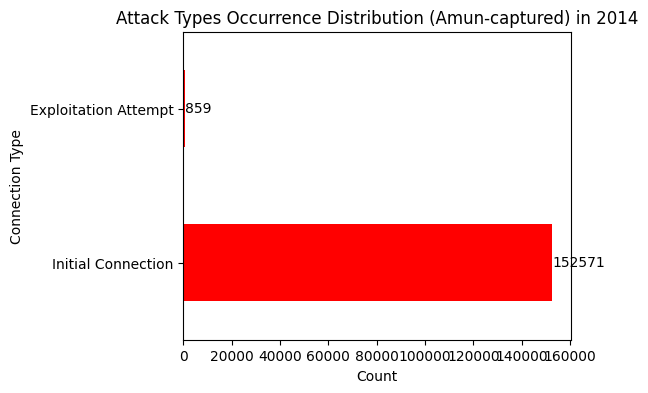

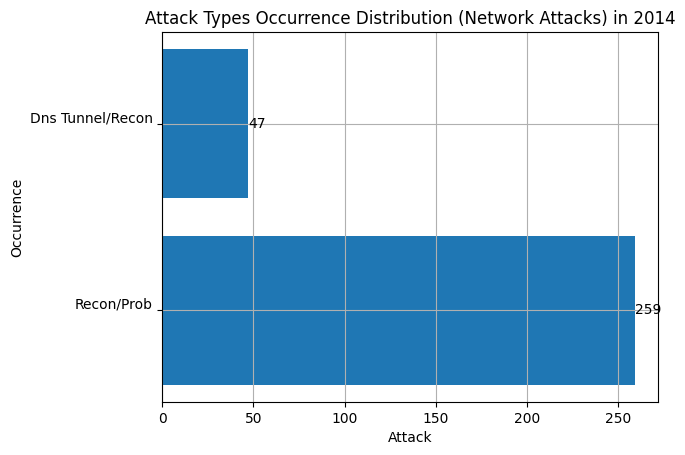

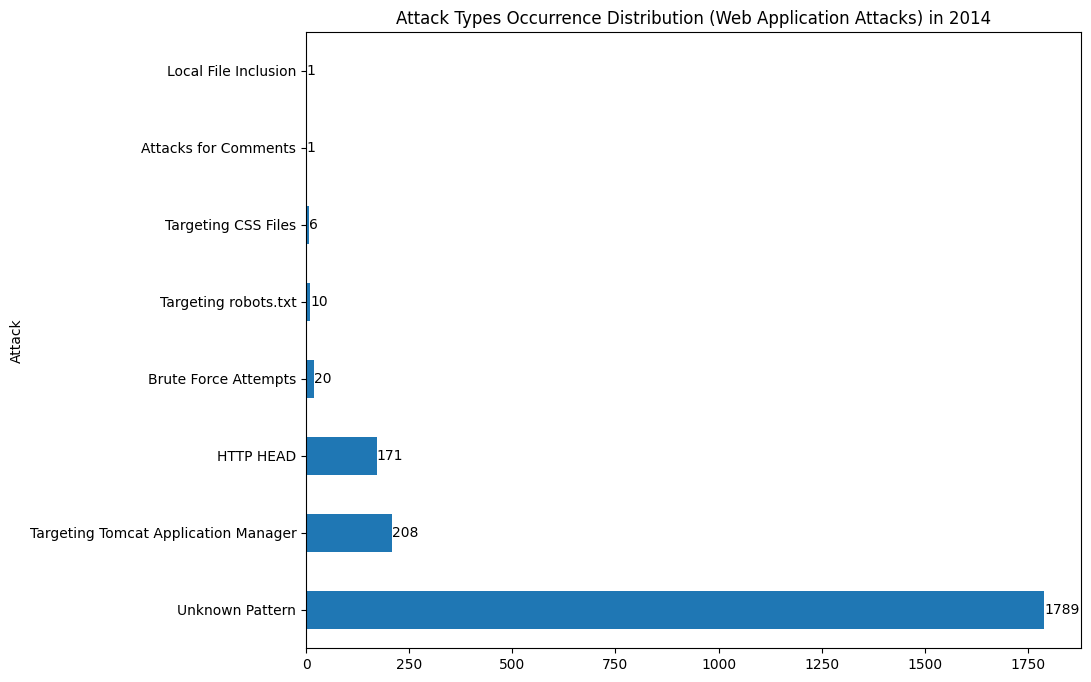

In [52]:
# 2014

# ---------- AMUN-CAPTURED ------------
combined_amundf_2014 = pandas.DataFrame({'count': data_set['connectionType'][(data_set['date'].str[:4] == '2014') & (data_set['channel'] == 'amun[.]events')].value_counts(), 'Attack': oAttacks1.values})

init2014 = combined_amundf_2014.groupby('Attack')['count'].sum()['Initial Connection']
exploitation2014 = combined_amundf_2014 .groupby('Attack')['count'].sum()['Exploitation Attempt']


plot_data = combined_amundf_2014.set_index('Attack')['count']
ax = plot_data.plot(kind='barh', figsize=(5, 4), color= "r")

for index, value in enumerate(plot_data):
    matplotlib.pyplot.text(value, index, str(value), va='center')

matplotlib.pyplot.title('Attack Types Occurrence Distribution (Amun-captured) in 2014')
matplotlib.pyplot.xlabel('Count')
matplotlib.pyplot.ylabel('Connection Type')
matplotlib.pyplot.show()

# ---------- NETWORK ------------
networkAttacks2014= pandas.Series(["Reconnaissance/Probing", "DNS Tunneling/Reconnaissance", "Reconnaissance/Probing"])
#Output above matches with these suspicious events (according to the analysis in first part)


combined_network_df_2014 = pandas.DataFrame({'count': data_set['signature'][(data_set['date'].str[:4] == '2014') & (data_set['channel'] == 'snort[.]alerts')].value_counts(), 'Attack': networkAttacks2014.values})


reconProb2014 = combined_network_df_2014.groupby('Attack')['count'].sum()['Reconnaissance/Probing']
dnsTunnelRecon2014 = combined_network_df_2014.groupby('Attack')['count'].sum()['DNS Tunneling/Reconnaissance']

values = [ reconProb2014, dnsTunnelRecon2014]
labels = ['Recon/Prob\n', 'Dns Tunnel/Recon\n',]
matplotlib.pyplot.barh(labels, values)
matplotlib.pyplot.xlabel('Attack')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.ylabel('Occurrence')
matplotlib.pyplot.title('Attack Types Occurrence Distribution (Network Attacks) in 2014')

for i, v in enumerate(values):
    matplotlib.pyplot.text(v, i, str(v), ha='left', va='center')

matplotlib.pyplot.show()


# ---------- WEB APP ------------
webAttacks2014= pandas.Series(["Unknown Pattern","Targeting Tomcat Application Manager","HTTP HEAD","Brute Force Attempts", "Targeting robots.txt", "Targeting CSS Files", "Attacks for Comments", "Local File Inclusion"])
#Output above matches with these suspicious events (according to the analysis in first part)


combined_web_df_2014 = pandas.DataFrame({'count': data_set['pattern'][(data_set['date'].str[:4] == '2014') & (data_set['channel'] == 'glastopf[.]events')].value_counts(), 'Attack': webAttacks2014.values})


matplotlib.pyplot.title('Attack Types Occurrence Distribution (Web Application Attacks) in 2014')
plot_data = combined_web_df_2014.set_index('Attack')['count']
ax = plot_data.plot(kind='barh', figsize=(10, 8))

for index, value in enumerate(plot_data):
    matplotlib.pyplot.text(value, index, str(value), va='center')

# Show the plot
matplotlib.pyplot.show()

### Most Frequent Attacker in 2014

In [53]:
attackers2014_1 = data_set['attackerIP'][(data_set['date'].str[:4] == '2014')].value_counts() # For 2014 AMUN channel attacks (Other)
attackers2014_2 = data_set['source'][(data_set['date'].str[:4] == '2014')].value_counts() # For 2014 GLASTOPF channel attacks (Web)
attackers2014_3 = data_set['source_ip'][(data_set['date'].str[:4] == '2014')].value_counts() # For 2014 SNORT channel attacks (Network)

allAttackers2014 = attackers2014_1.add(attackers2014_2, fill_value=0)
allAttackers2014 = allAttackers2014.add(attackers2014_3, fill_value=0)
allAttackers2014 = allAttackers2014.sort_values(ascending=False)
print(allAttackers2014.head(20))

61[.]153[.]106[.]24      50212.0
71[.]190[.]176[.]162      9518.0
74[.]91[.]25[.]122        6386.0
1[.]34[.]22[.]39          5025.0
204[.]188[.]195[.]74      4129.0
104[.]171[.]112[.]125     3713.0
220[.]244[.]146[.]163     2275.0
201[.]232[.]0[.]40        2181.0
37[.]203[.]214[.]248      1730.0
54[.]169[.]105[.]234      1588.0
54[.]169[.]162[.]96       1585.0
71[.]179[.]27[.]162       1417.0
65[.]242[.]160[.]99       1364.0
81[.]148[.]97[.]56        1345.0
142[.]54[.]185[.]14       1334.0
216[.]224[.]229[.]236     1169.0
110[.]143[.]3[.]123       1168.0
14[.]35[.]234[.]212       1124.0
50[.]243[.]3[.]241        1027.0
54[.]169[.]85[.]158        797.0
Name: count, dtype: float64


As can be seen in geographical analysis section, 61.153.106.24 with 50212 occurence was China - Zhejiang. 

______________________________________________________
### Results for 2014:

- Most of the attacks came from **China - Zhejiang**.

- There are no attacks captured by Dionaea honeypot.

- In network attacks, there were **no spoofing, DoS, and DDoS attempts have conducted.** DNS Tunneling and Recon/Probs were:

In [35]:
percentage2014_dnstunnel = dnsTunnelRecon2014 * 100 / dnsTunnelRecon
percentage2014_reconprob = reconProb2014 * 100 / reconProb

print("In 2014, recon/prob attempts were the", "{:.2f}".format(percentage2014_reconprob), "% of all-time recon/prob attempts. (",reconProb2014,"/",reconProb,")")
print("In 2014, dns tunneling/recon attempts were the", "{:.2f}".format(percentage2014_dnstunnel), "% of all-time dns tunneling/recon attempts. (",dnsTunnelRecon2014,"/",dnsTunnelRecon,")")

In 2014, recon/prob attempts were the 2.73 % of all-time recon/prob attempts. ( 259 / 9483 )
In 2014, dns tunneling/recon attempts were the 3.06 % of all-time dns tunneling/recon attempts. ( 47 / 1535 )


--

- In web-based attacks, methods such as **SQL Injection, Targeting File Server Services, Remote File Inclusion, Targeting web-based MySQL database management, and Targeting PHP Files methods have not conducted.** Those that are implemented, constitute a certain percentage of the attacks implemented in all years.

--

- In Amun-captured attacks, exploitation and initial connection attempts were:

In [37]:
percentage2014_init = init2014 * 100 / init
percentage2014_exploit = exploitation2014 * 100 / exploitation

print("In 2014, initial connections were the", "{:.2f}".format(percentage2014_init), "% of all-time initial connection attempts. (",init2014,"/",init,")")
print("In 2014, exploitation attempts were the", "{:.2f}".format(percentage2014_exploit), "% of all-time exploitation attempts. (",exploitation2014,"/",exploitation,")")

In 2014, initial connections were the 41.60 % of all-time initial connection attempts. ( 152571 / 366765 )
In 2014, exploitation attempts were the 18.87 % of all-time exploitation attempts. ( 859 / 4552 )


______________________________________________________
### 2015 Analysis

Same algorithm will be used for attacks occured in 2015.

In 2015, all channels captured some attacks. ..

In [54]:
print("----2015----")

print("\nDionaea-captured attacks in 2015")
print(data_set['connection_protocol'][(data_set['date'].str[:4] == '2015') & (data_set['channel'] == 'dionaea[.]connections')].value_counts())
#As can be remembered from attack identification, dionaea events are inspected by their connection protocols.
print("\nAmun-captured attacks in 2015")
print(data_set['connectionType'][(data_set['date'].str[:4] == '2015') & (data_set['channel'] == 'amun[.]events')].value_counts())
print("\nNetwork attacks in 2015")
print(data_set['signature'][(data_set['date'].str[:4] == '2015') & (data_set['channel'] == 'snort[.]alerts')].value_counts())
print("\nWeb app. attacks in 2015")
print(data_set['pattern'][(data_set['date'].str[:4] == '2015') & (data_set['channel'] == 'glastopf[.]events')].value_counts())

----2015----

Dionaea-captured attacks in 2015
connection_protocol
pcap                 103011
SipSession            37442
SipCall               11793
mysqld                 5759
mssqld                 1966
smbd                   1762
RtpUdpStream           1606
ftpd                    368
epmapper                138
ftpdatalisten            51
TftpServerHandler        19
remoteshell               2
Name: count, dtype: int64

Amun-captured attacks in 2015
connectionType
initial    214194
exploit      3693
Name: count, dtype: int64

Network attacks in 2015
signature
BAD-TRAFFIC same SRC/DST                                                                           1095
ET POLICY Unusual number of DNS No Such Name Responses                                              908
ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited      98
ICMP Destination Unreachable Communication Administratively Prohibited                                2
COMMUNITY SI

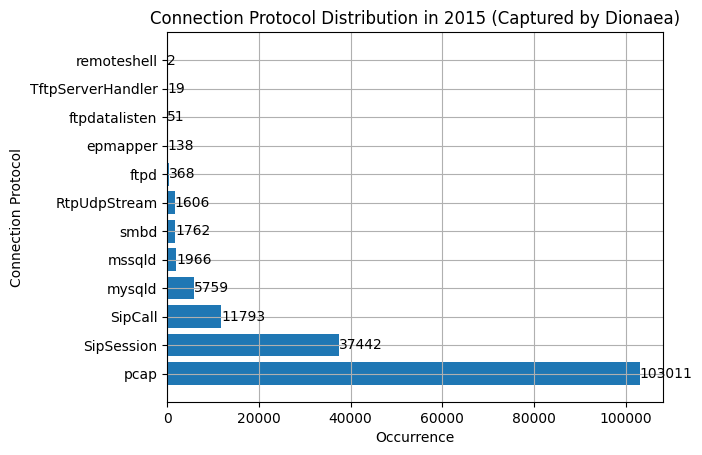

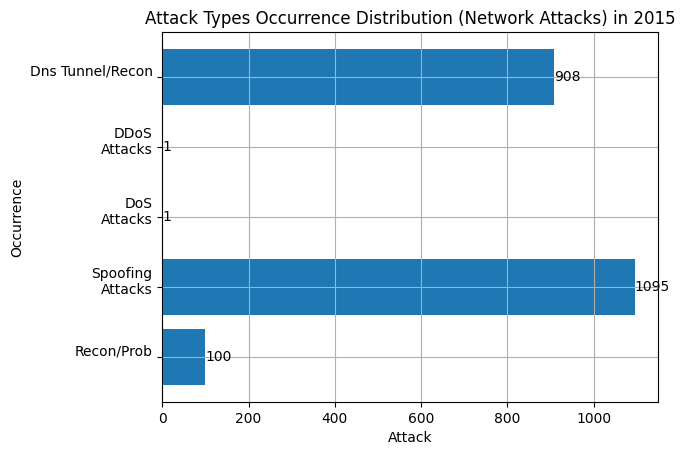

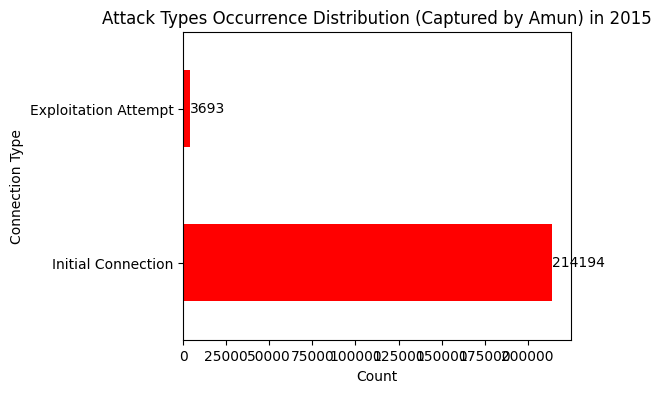

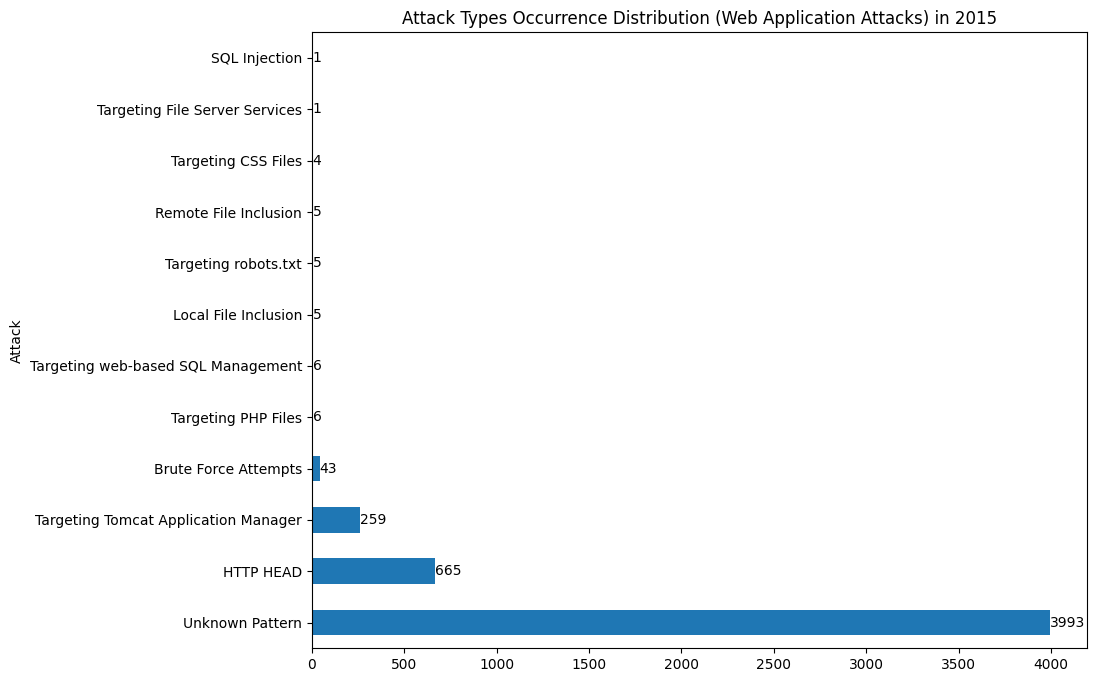

In [39]:
# 2015

# ---------- DIONAEA-CAPTURED ------------

matplotlib.pyplot.barh(data_set['connection_protocol'][(data_set['date'].str[:4] == '2015') & (data_set['channel'] == 'dionaea[.]connections')].value_counts().index, data_set['connection_protocol'][(data_set['date'].str[:4] == '2015') & (data_set['channel'] == 'dionaea[.]connections')].value_counts().values)
for i, v in enumerate(data_set['connection_protocol'][(data_set['date'].str[:4] == '2015') & (data_set['channel'] == 'dionaea[.]connections')].value_counts().values):
    matplotlib.pyplot.text(v, i, str(v), ha='left', va='center')

matplotlib.pyplot.xlabel('Occurrence')
matplotlib.pyplot.ylabel('Connection Protocol')
matplotlib.pyplot.title('Connection Protocol Distribution in 2015 (Captured by Dionaea)')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

# ---------- NETWORK ------------
networkAttacks2015= pandas.Series(["Spoofing Attack", "DNS Tunneling/Reconnaissance","Reconnaissance/Probing" ,"Reconnaissance/Probing","DoS Attack", "DDoS Attack"])
combined_network_df_2015 = pandas.DataFrame({'count': data_set['signature'][(data_set['date'].str[:4] == '2015') & (data_set['channel'] == 'snort[.]alerts')].value_counts(), 'Attack': networkAttacks2015.values})


reconProb2015 = combined_network_df_2015.groupby('Attack')['count'].sum()['Reconnaissance/Probing']
dnsTunnelRecon2015 = combined_network_df_2015.groupby('Attack')['count'].sum()['DNS Tunneling/Reconnaissance']
spoof2015 = combined_network_df_2015.groupby('Attack')['count'].sum()['Spoofing Attack']
ddos2015 = combined_network_df_2015.groupby('Attack')['count'].sum()['DDoS Attack']
dos2015 = combined_network_df_2015.groupby('Attack')['count'].sum()['DoS Attack']

values = [ reconProb2015, spoof2015, dos2015, ddos2015, dnsTunnelRecon2015]
labels = ['Recon/Prob\n', 'Spoofing\nAttacks\n', 'DoS\nAttacks\n', 'DDoS\nAttacks\n', 'Dns Tunnel/Recon\n',]
matplotlib.pyplot.barh(labels, values)
matplotlib.pyplot.xlabel('Attack')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.ylabel('Occurrence')
matplotlib.pyplot.title('Attack Types Occurrence Distribution (Network Attacks) in 2015')

for i, v in enumerate(values):
    matplotlib.pyplot.text(v, i, str(v), ha='left', va='center')

matplotlib.pyplot.show()

# ---------- AMUN-CAPTURED ------------
combined_amundf_2015 = pandas.DataFrame({'count': data_set['connectionType'][(data_set['date'].str[:4] == '2015') & (data_set['channel'] == 'amun[.]events')].value_counts(), 'Attack': oAttacks1.values})

init2015 = combined_amundf_2015.groupby('Attack')['count'].sum()['Initial Connection']
exploitation2015 = combined_amundf_2015 .groupby('Attack')['count'].sum()['Exploitation Attempt']


plot_data = combined_amundf_2015.set_index('Attack')['count']
ax = plot_data.plot(kind='barh', figsize=(5, 4), color= "r")

for index, value in enumerate(plot_data):
    matplotlib.pyplot.text(value, index, str(value), va='center')

matplotlib.pyplot.title('Attack Types Occurrence Distribution (Captured by Amun) in 2015')
matplotlib.pyplot.xlabel('Count')
matplotlib.pyplot.ylabel('Connection Type')
matplotlib.pyplot.show()

# ---------- WEB APP ------------
webAttacks2015= pandas.Series(["Unknown Pattern","HTTP HEAD","Targeting Tomcat Application Manager", "Brute Force Attempts", "Targeting PHP Files","Targeting web-based SQL Management",  "Local File Inclusion", "Targeting robots.txt", "Remote File Inclusion", "Targeting CSS Files", "Targeting File Server Services", "SQL Injection"])
#Output above (2015 glastopf-captured patterns) matches with these methods according to the analysis in first part)


combined_web_df_2015 = pandas.DataFrame({'count': data_set['pattern'][(data_set['date'].str[:4] == '2015') & (data_set['channel'] == 'glastopf[.]events')].value_counts(), 'Attack': webAttacks2015.values})


matplotlib.pyplot.title('Attack Types Occurrence Distribution (Web Application Attacks) in 2015')
plot_data = combined_web_df_2015.set_index('Attack')['count']
ax = plot_data.plot(kind='barh', figsize=(10, 8))

for index, value in enumerate(plot_data):
    matplotlib.pyplot.text(value, index, str(value), va='center')

# Show the plot
matplotlib.pyplot.show()

### Most Frequent Attacker in 2015

In [39]:
attackers2015_1 = data_set['attackerIP'][(data_set['date'].str[:4] == '2015')].value_counts() # For 2015 AMUN channel attacks (Other)
attackers2015_2 = data_set['source'][(data_set['date'].str[:4] == '2015')].value_counts() # For 2015 GLASTOPF channel attacks (Web)
attackers2015_3 = data_set['source_ip'][(data_set['date'].str[:4] == '2015')].value_counts() # For 2015 SNORT channel attacks (Network)
attackers2015_4 = data_set['remote_host'][(data_set['date'].str[:4] == '2015')].value_counts() # For 2015 DIONAEA channel attacks (Other)

allAttackers2015 = attackers2015_1.add(attackers2015_2, fill_value=0)
allAttackers2015 = allAttackers2015.add(attackers2015_3, fill_value=0)
allAttackers2015 = allAttackers2015.add(attackers2015_4, fill_value=0)
allAttackers2015 = allAttackers2015.sort_values(ascending=False)
print(allAttackers2015.head(20))

::ffff:5[.]152[.]222[.]194     13587.0
66[.]191[.]136[.]146           12156.0
5[.]152[.]216[.]226             8283.0
61[.]160[.]213[.]32             7618.0
::ffff:88[.]150[.]252[.]176     7498.0
198[.]101[.]193[.]22            6696.0
::ffff:85[.]25[.]207[.]170      5353.0
194[.]63[.]142[.]218            5125.0
58[.]218[.]204[.]225            4759.0
61[.]219[.]142[.]11             4730.0
165[.]225[.]157[.]188           4700.0
221[.]192[.]199[.]54            4593.0
12[.]106[.]79[.]186             4589.0
198[.]154[.]63[.]131            4241.0
173[.]208[.]184[.]6             4072.0
37[.]203[.]214[.]134            3412.0
98[.]102[.]80[.]70              2777.0
61[.]183[.]128[.]6              2456.0
46[.]51[.]219[.]201             2403.0
72[.]80[.]153[.]99              2177.0
Name: count, dtype: float64


The leader is 5.152.222.194, with 13587 occurences in 2015. This IP address is representing United Kingdom (England) location in geographical analysis.

### Results for 2015:

- Attacks mostly came from the **United Kingdom's England region.**

- In 2015, all channels captured attacks. Methods of web attacks and protocols of Dionaea-captured attacks are the part of overall number of their category. And:

In [40]:
percentage2015_dnstunnel = dnsTunnelRecon2015 * 100 / dnsTunnelRecon
percentage2015_reconprob = reconProb2015 * 100 / reconProb
percentage2015_dos = dos2015 * 100 / dos
percentage2015_ddos = ddos2015 * 100 / ddos
percentage2015_spoofing = spoof2015 * 100 / spoofing
percentage2015_init = init2015 * 100 / init
percentage2015_exploit = exploitation2015 * 100 / exploitation

print("In 2015, initial connections were the", "{:.2f}".format(percentage2015_init), "% of all-time initial connection attempts. (",init2015,"/",init,")")
print("In 2015, exploitation attempts were the", "{:.2f}".format(percentage2015_exploit), "% of all-time exploitation attempts. (",exploitation2015,"/",exploitation,")")
print("In 2015, recon/prob attempts were the", "{:.2f}".format(percentage2015_reconprob), "% of all-time recon/prob attempts. (",reconProb2015,"/",reconProb,")")
print("In 2015, dns tunneling/recon attempts were the", "{:.2f}".format(percentage2015_dnstunnel), "% of all-time dns tunneling/recon attempts. (",dnsTunnelRecon2015,"/",dnsTunnelRecon,")")
print("In 2015, spoofing attacks were the", "{:.2f}".format(percentage2015_spoofing), "% of spoofing attacks. (",spoof2015,"/",spoofing,")")
print("In 2015, DoS attacks were the", "{:.2f}".format(percentage2015_dos), "% of all-time DoS attacks. (",dos2015,"/",dos,")")
print("In 2015, DDoS attacks were the", "{:.2f}".format(percentage2015_ddos), "% of all-time DDoS attacks. (",ddos2015,"/",ddos,")")

In 2015, initial connections were the 58.40 % of all-time initial connection attempts. ( 214194 / 366765 )
In 2015, exploitation attempts were the 81.13 % of all-time exploitation attempts. ( 3693 / 4552 )
In 2015, recon/prob attempts were the 1.05 % of all-time recon/prob attempts. ( 100 / 9483 )
In 2015, dns tunneling/recon attempts were the 59.15 % of all-time dns tunneling/recon attempts. ( 908 / 1535 )
In 2015, spoofing attacks were the 3.72 % of spoofing attacks. ( 1095 / 29418 )
In 2015, DoS attacks were the 16.67 % of all-time DoS attacks. ( 1 / 6 )
In 2015, DDoS attacks were the 25.00 % of all-time DDoS attacks. ( 1 / 4 )


______________________________________________________
### 2016 Analysis

Same algorithm will be used for attacks conducted in 2016.

In 2016, only Dionaea and Snort channels captured some attacks.

In [41]:
print("----2016----")
print("\nDionaea-captured attacks in 2016")
print(data_set['connection_protocol'][(data_set['date'].str[:4] == '2016') & (data_set['channel'] == 'dionaea[.]connections')].value_counts())

print("\nNetwork attacks in 2016")
print(data_set['signature'][(data_set['date'].str[:4] == '2016') & (data_set['channel'] == 'snort[.]alerts')].value_counts())

----2016----

Dionaea-captured attacks in 2016
connection_protocol
pcap                 224897
SipCall               29032
SipSession            26850
mysqld                 6664
mssqld                 1784
RtpUdpStream           1108
smbd                    595
ftpd                    375
epmapper                197
TftpServerHandler       179
ftpdatalisten            48
emulation                22
mirrorc                   2
mirrord                   2
Name: count, dtype: int64

Network attacks in 2016
signature
BAD-TRAFFIC same SRC/DST                                                                           28323
ICMP Destination Unreachable Communication with Destination Host is Administratively Prohibited     9123
ET POLICY Unusual number of DNS No Such Name Responses                                               580
GPL VOIP SIP INVITE message flooding                                                                   3
ET DOS Possible NTP DDoS Inbound Frequent Un-Authed MON_LIST

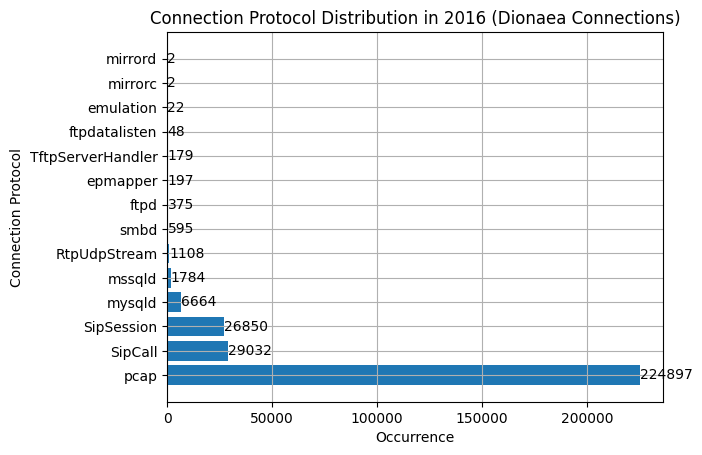

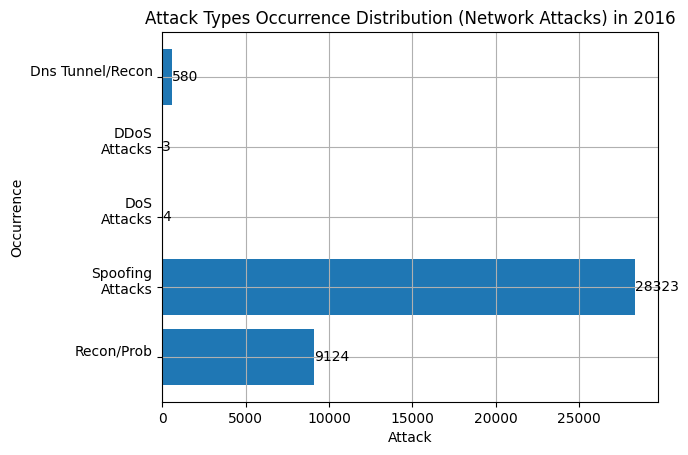

In [55]:
# 2016

# ---------- DIONAEA-CAPTURED ------------

matplotlib.pyplot.barh(data_set['connection_protocol'][(data_set['date'].str[:4] == '2016') & (data_set['channel'] == 'dionaea[.]connections')].value_counts().index, data_set['connection_protocol'][(data_set['date'].str[:4] == '2016') & (data_set['channel'] == 'dionaea[.]connections')].value_counts().values)
for i, v in enumerate(data_set['connection_protocol'][(data_set['date'].str[:4] == '2016') & (data_set['channel'] == 'dionaea[.]connections')].value_counts().values):
    matplotlib.pyplot.text(v, i, str(v), ha='left', va='center')

matplotlib.pyplot.xlabel('Occurrence')
matplotlib.pyplot.ylabel('Connection Protocol')
matplotlib.pyplot.title('Connection Protocol Distribution in 2016 (Dionaea Connections)')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

# ---------- NETWORK ------------
networkAttacks2016= pandas.Series(["Spoofing Attack", "Reconnaissance/Probing", "DNS Tunneling/Reconnaissance", "DoS Attack", "DDoS Attack", "DoS Attack", "DDoS Attack", "Reconnaissance/Probing",])
combined_network_df_2016 = pandas.DataFrame({'count': data_set['signature'][(data_set['date'].str[:4] == '2016') & (data_set['channel'] == 'snort[.]alerts')].value_counts(), 'Attack': networkAttacks2016.values})


reconProb2016 = combined_network_df_2016.groupby('Attack')['count'].sum()['Reconnaissance/Probing']
dnsTunnelRecon2016 = combined_network_df_2016.groupby('Attack')['count'].sum()['DNS Tunneling/Reconnaissance']
spoof2016 = combined_network_df_2016.groupby('Attack')['count'].sum()['Spoofing Attack']
ddos2016 = combined_network_df_2016.groupby('Attack')['count'].sum()['DDoS Attack']
dos2016 = combined_network_df_2016.groupby('Attack')['count'].sum()['DoS Attack']

##Network Attacks 
values = [ reconProb2016, spoof2016, dos2016, ddos2016, dnsTunnelRecon2016]
labels = ['Recon/Prob\n', 'Spoofing\nAttacks\n', 'DoS\nAttacks\n', 'DDoS\nAttacks\n', 'Dns Tunnel/Recon\n',]
matplotlib.pyplot.barh(labels, values)
matplotlib.pyplot.xlabel('Attack')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.ylabel('Occurrence')
matplotlib.pyplot.title('Attack Types Occurrence Distribution (Network Attacks) in 2016')

for i, v in enumerate(values):
    matplotlib.pyplot.text(v, i, str(v), ha='left', va='center')

matplotlib.pyplot.show()

### Most frequent attacker in 2016

In [56]:
attackers2016_1 = data_set['source_ip'][(data_set['date'].str[:4] == '2016')].value_counts() # For 2015 SNORT channel attacks (Network)
attackers2016_2 = data_set['remote_host'][(data_set['date'].str[:4] == '2016')].value_counts() # For 2015 DIONAEA channel attacks (Other)

allAttackers2016 = attackers2016_1.add(attackers2016_2, fill_value=0)
allAttackers2016 = allAttackers2016.sort_values(ascending=False)
print(allAttackers2016.head(20))

163[.]172[.]67[.]30            72025.0
::ffff:185[.]40[.]4[.]65       30318.0
0[.]0[.]0[.]0                  28323.0
::ffff:93[.]115[.]27[.]34       3761.0
58[.]218[.]204[.]225            2853.0
93[.]174[.]93[.]136             2670.0
58[.]218[.]205[.]83             2465.0
::ffff:85[.]25[.]207[.]170      2283.0
78[.]31[.]69[.]187              2092.0
94[.]102[.]49[.]174             1576.0
::ffff:185[.]40[.]4[.]93        1058.0
::ffff:209[.]126[.]122[.]40     1040.0
80[.]87[.]205[.]246             1032.0
89[.]163[.]144[.]243             904.0
37[.]203[.]214[.]106             813.0
107[.]150[.]45[.]234             742.0
::ffff:37[.]75[.]215[.]96        646.0
8[.]8[.]8[.]8                    580.0
::ffff:89[.]163[.]222[.]79       530.0
61[.]240[.]144[.]66              499.0
Name: count, dtype: float64


As can be seen, the leader is 163.172.67.30 with 72025 occurences, which is Île-de-France region of France. 

### Results for 2016:

- Attacks mostly came from **France** with the greatest occurence in overall dataset.

- There are no attacks captured by Glastopf and Amun honeypots, and:

In [44]:
percentage2016_dnstunnel = dnsTunnelRecon2016 * 100 / dnsTunnelRecon
percentage2016_reconprob = reconProb2016 * 100 / reconProb
percentage2016_dos = dos2016 * 100 / dos
percentage2016_ddos = ddos2016 * 100 / ddos
percentage2016_spoofing = spoof2016 * 100 / spoofing

print("In 2016, recon/prob attempts were the", "{:.2f}".format(percentage2016_reconprob), "% of all-time recon/prob attempts. (",reconProb2016,"/",reconProb,")")
print("In 2016, dns tunneling/recon attempts were the", "{:.2f}".format(percentage2016_dnstunnel), "% of all-time dns tunneling/recon attempts. (",dnsTunnelRecon2016,"/",dnsTunnelRecon,")")
print("In 2016, spoofing attacks were the", "{:.2f}".format(percentage2016_spoofing), "% of spoofing attacks. (",spoof2016,"/",spoofing,")")
print("In 2016, DoS attacks were the", "{:.2f}".format(percentage2016_dos), "% of all-time DoS attacks. (",dos2016,"/",dos,")")
print("In 2016, DDoS attacks were the", "{:.2f}".format(percentage2016_ddos), "% of all-time DDoS attacks. (",ddos2016,"/",ddos,")")

In 2016, recon/prob attempts were the 96.21 % of all-time recon/prob attempts. ( 9124 / 9483 )
In 2016, dns tunneling/recon attempts were the 37.79 % of all-time dns tunneling/recon attempts. ( 580 / 1535 )
In 2016, spoofing attacks were the 96.28 % of spoofing attacks. ( 28323 / 29418 )
In 2016, DoS attacks were the 66.67 % of all-time DoS attacks. ( 4 / 6 )
In 2016, DDoS attacks were the 75.00 % of all-time DDoS attacks. ( 3 / 4 )


And, protocols used for dionaea-captured attacks are creating a percentage of all their all-time usage.

______________________________________________________
### 2017 Analysis

Same algorithm will be used for attacks done in 2017.

In 2017, only Dionaea and Snort channels captured some attacks, same as last year. However, the details may be different. Thus, events in 2016 in 2017 will inspected seperately.

In [43]:
print("----2017----")
print("\nDionaea-captured attacks in 2017")
print(data_set['connection_protocol'][(data_set['date'].str[:4] == '2017') & (data_set['channel'] == 'dionaea[.]connections')].value_counts())
print("\nNetwork attacks in 2016")
print(data_set['signature'][(data_set['date'].str[:4] == '2017') & (data_set['channel'] == 'snort[.]alerts')].value_counts())

----2017----

Dionaea-captured attacks in 2017
connection_protocol
pcap                 109302
SipSession             4451
mysqld                 1992
SipCall                1787
mssqld                 1263
smbd                    343
RtpUdpStream            119
ftpd                     87
epmapper                 75
TftpServerHandler        34
mirrorc                  25
mirrord                  25
ftpdatalisten             4
emulation                 1
Name: count, dtype: int64

Network attacks in 2016
signature
COMMUNITY SIP TCP/IP message flooding directed to SIP proxy    1
Name: count, dtype: int64


Only 1 network attack (SIP, which means, DoS attack) has occured in 2017. Others were dionaea-captured attack, which are shown below:

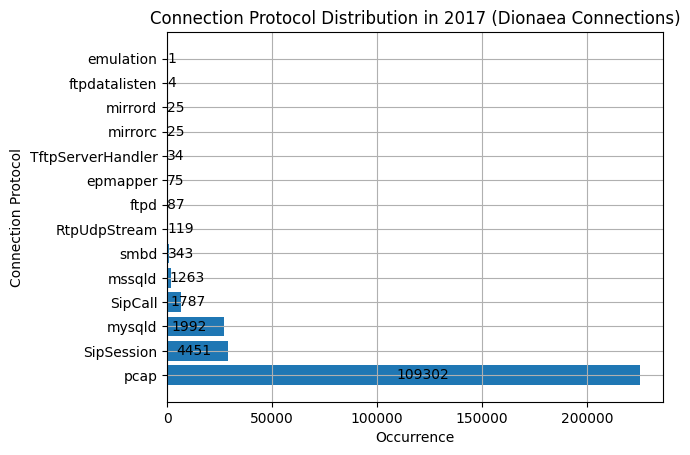

In [44]:
matplotlib.pyplot.barh(data_set['connection_protocol'][(data_set['date'].str[:4] == '2017') & (data_set['channel'] == 'dionaea[.]connections')].value_counts().index, data_set['connection_protocol'][(data_set['date'].str[:4] == '2016') & (data_set['channel'] == 'dionaea[.]connections')].value_counts().values)
for i, v in enumerate(data_set['connection_protocol'][(data_set['date'].str[:4] == '2017') & (data_set['channel'] == 'dionaea[.]connections')].value_counts().values):
    matplotlib.pyplot.text(v, i, str(v), ha='left', va='center')

matplotlib.pyplot.xlabel('Occurrence')
matplotlib.pyplot.ylabel('Connection Protocol')
matplotlib.pyplot.title('Connection Protocol Distribution in 2017 (Dionaea Connections)')
matplotlib.pyplot.grid(True)
matplotlib.pyplot.show()

### Most frequent attacker for 2017

In [46]:
attackers2017_1 = data_set['source_ip'][(data_set['date'].str[:4] == '2017')].value_counts() # For 2015 SNORT channel attacks (Network)
attackers2017_2 = data_set['remote_host'][(data_set['date'].str[:4] == '2017')].value_counts() # For 2015 DIONAEA channel attacks (Other)

allAttackers2017 = attackers2017_1.add(attackers2017_2, fill_value=0)
allAttackers2017 = allAttackers2017.sort_values(ascending=False)
print(allAttackers2017.head(20))

162[.]254[.]205[.]73            50569.0
83[.]136[.]86[.]188              5456.0
115[.]186[.]243[.]60             1066.0
::ffff:62[.]210[.]245[.]31        972.0
93[.]174[.]93[.]136               889.0
::ffff:78[.]129[.]132[.]12        661.0
1[.]162[.]239[.]234               462.0
1[.]162[.]171[.]184               455.0
::ffff:62[.]210[.]244[.]196       401.0
1[.]162[.]236[.]160               400.0
1[.]162[.]233[.]233               375.0
::ffff:193[.]111[.]140[.]108      361.0
111[.]251[.]96[.]74               359.0
1[.]162[.]237[.]31                357.0
1[.]160[.]41[.]28                 354.0
::ffff:60[.]211[.]166[.]53        271.0
::ffff:123[.]249[.]3[.]250        250.0
::ffff:195[.]154[.]181[.]110      226.0
1[.]162[.]172[.]26                224.0
1[.]162[.]232[.]188               214.0
Name: count, dtype: float64


### Results for 2017:

- Most of the attacks came from **Florida region of United States**.

- There were only 1 DoS attack (16.67% of all time DoS Attacks), rest of the attacks were Dionaea-captured attacks with their visualized protocols.

_______________________________________________________________
## **Overall Time Analysis Summary**

- Network attacks occured regularly in every year, but mostly in 2016. Types of network attacks have distributed in different years with different percentages.

- Web application attack methods used in 2014 and 2015 only. Some of the methods used in 2014 only, some of them used in 2015 only, and some of them used in both years. Mostly used pattern is unknown.

- Dionaea-captured attacks that identified in first section, not occured in 2014, but occured regularly in following years. The protocol distribution has changed in every year, but, pcap was the leader in every year.

- Amun-captured attacks (initial connection and exploitation attempts), only occured in 2014 and 2015 only, same as web attack methods usage time interval. Each year, occurence of initial connection was much more stronger than the exploitation attempts.

- In geographical location analysis, top IP addresses have conducted their attacks for a specific year. For instance, leader IP address (France) and its followers (United States-Florida, China-Zhejiang, United Kingdom-England) occurences in overall analysis also appeared in the specific years. This means that these IP addresses did not distribute their attacks into different years.


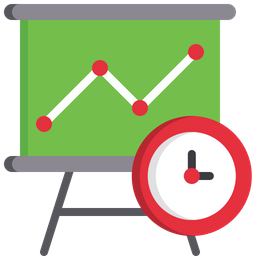

## **Visualization of total events over timestamp with port information**

In [47]:
#From the logic in the helper code, converting date to datetime in a single line.

data_set['date'] = pandas.to_datetime(data_set['date'].str.replace('[.]', '.')) 
#Including Removing square parantheses and datetime conversion

data_set #Check.

,id,identification,normalised,date,channel,pattern,source,source_port,attackerIP,attackerPort,...,signature,payload_date,sensor,connection_type,local_host,local_port,connection_protocol,connection_transport,remote_host,remote_port
0,5426456e9f8c6d41306aea57,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27 05:04:46.363000+00:00,glastopf[.]events,style_css,162[.]197[.]24[.]67,60871.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,542645799f8c6d41306aea59,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27 05:04:57.901000+00:00,glastopf[.]events,unknown,162[.]197[.]24[.]67,60871.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5426457a9f8c6d41306aea5a,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27 05:04:58.066000+00:00,glastopf[.]events,style_css,162[.]197[.]24[.]67,60871.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5426457a9f8c6d41306aea5d,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27 05:04:58.248000+00:00,glastopf[.]events,unknown,162[.]197[.]24[.]67,60871.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5426462d9f8c6d41306aea5f,a16f5f36-3c41-11e4-9ee4-0a0b6e7c3e9e,True,2014-09-27 05:07:57.267000+00:00,glastopf[.]events,unknown,173[.]174[.]71[.]56,62918.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994137,58b4f7309f8c6d649a3f4046,a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e,False,2017-02-28 04:06:08.365000+00:00,dionaea[.]connections,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reject,162[.]244[.]30[.]100,23.0,pcap,tcp,88[.]250[.]18[.]143,62577.0
994138,58b4f7ba9f8c6d649a3f4047,a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e,False,2017-02-28 04:08:26.004000+00:00,dionaea[.]connections,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reject,162[.]244[.]30[.]100,2323.0,pcap,tcp,211[.]22[.]222[.]35,48327.0
994139,58b4f7cf9f8c6d649a3f4048,a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e,False,2017-02-28 04:08:47.102000+00:00,dionaea[.]connections,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,connect,::,5060.0,SipSession,udp,::ffff:62[.]210[.]245[.]31,41254.0
994140,58b4f7dd9f8c6d649a3f4049,a13907c8-c1c1-11e4-9ee4-0a0b6e7c3e9e,False,2017-02-28 04:09:01.710000+00:00,dionaea[.]connections,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,reject,162[.]244[.]30[.]100,5358.0,pcap,tcp,177[.]243[.]209[.]233,46866.0


Now, all date columns converted to "datetime" type.

Since glastopf events are no "destination port" attribute and Snort alerts have no "port" data, they cannot be included in this analysis. But others can be analyzed.

        remote_port  local_port                             date
215315      44516.0        23.0 2015-03-03 16:40:31.681000+00:00
215318      33122.0      3128.0 2015-03-03 16:50:35.359000+00:00
215320      56252.0        23.0 2015-03-03 16:56:09.910000+00:00
215323      42412.0        80.0 2015-03-03 17:02:31.759000+00:00
215325      33122.0      3128.0 2015-03-03 17:08:44.617000+00:00
...             ...         ...                              ...
994137      62577.0        23.0 2017-02-28 04:06:08.365000+00:00
994138      48327.0      2323.0 2017-02-28 04:08:26.004000+00:00
994139      41254.0      5060.0 2017-02-28 04:08:47.102000+00:00
994140      46866.0      5358.0 2017-02-28 04:09:01.710000+00:00
994141      53533.0      7547.0 2017-02-28 04:09:06.890000+00:00

[575180 rows x 3 columns]


C:\Users\EGEMEN ÖNDER\AppData\Local\Temp\ipykernel_15264\1444818690.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(ticklabels))


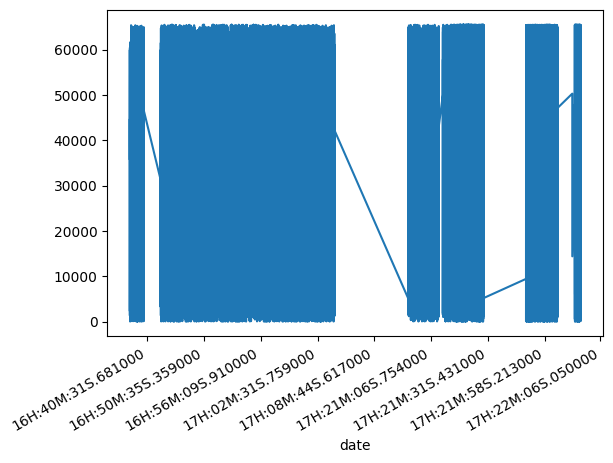

        attackerPort  victimPort                             date
34           57230.0        80.0 2014-09-28 04:55:17.147000+00:00
35           44621.0        80.0 2014-09-28 05:05:28.994000+00:00
36           50861.0        80.0 2014-09-28 06:05:25.530000+00:00
39            3474.0      8080.0 2014-09-28 06:41:41.918000+00:00
42            3694.0      3389.0 2014-09-28 07:26:22.730000+00:00
...              ...         ...                              ...
432484       46290.0        23.0 2015-07-20 15:27:21.482000+00:00
432485       46330.0        23.0 2015-07-20 15:27:22.664000+00:00
432486       46374.0        23.0 2015-07-20 15:27:23.861000+00:00
432487       46410.0        23.0 2015-07-20 15:27:25.129000+00:00
432488        4031.0      8080.0 2015-07-20 15:28:38.437000+00:00

[371317 rows x 3 columns]


C:\Users\EGEMEN ÖNDER\AppData\Local\Temp\ipykernel_15264\1444818690.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(ticklabels))


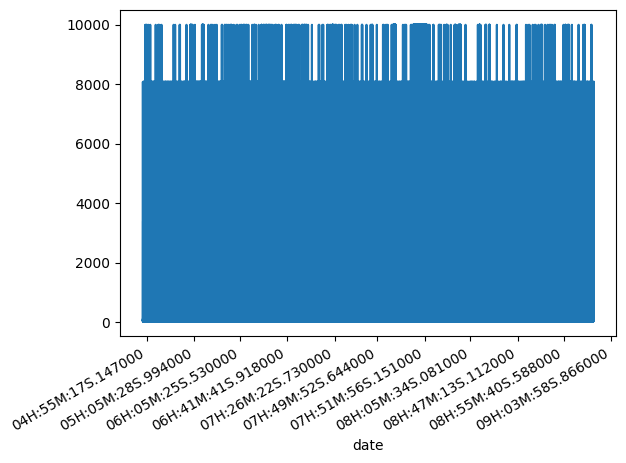

In [48]:
#From helper code logic..

## Dionaea
data_set_2 = data_set[data_set['channel'] == 'dionaea[.]connections']

data_set_2 = data_set_2[['remote_port', 'local_port','date']]
print(data_set_2)


data_set_2.set_index('date', inplace=True)

ax = data_set_2['remote_port'].plot()

ticklabels = data_set_2.index.strftime('%HH:%MM:%SS.%f')
ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(ticklabels))
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
matplotlib.pyplot.show()


## Amun


data_set_3 = data_set[data_set['channel'] == 'amun[.]events']

data_set_3 = data_set_3[['attackerPort', 'victimPort','date']]
print(data_set_3)


data_set_3.set_index('date', inplace=True)

ax = data_set_3['victimPort'].plot()

ticklabels = data_set_3.index.strftime('%HH:%MM:%SS.%f')
ax.xaxis.set_major_formatter(matplotlib.ticker.FixedFormatter(ticklabels))
ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%d'))
matplotlib.pyplot.show()

____________________________________________________________________________________________________________________________________________________________
## 5- Glaring IoCs of the attacks


Building upon the attacks identified in the previous section, the analysis will now enumerate and examine the corresponding Indicators of Compromise to elucidate the specific forensic evidence of these security incidents.

In order to achieve it, most frequent source ports and source IPs (IoCs) will be shared via code below.

In [41]:
# As created, numberOfAttacksSetWithIps attribute stores all the attackerIps. Thus, this will be the first variable that includes some IoCs.

print("Top IoCs\n\nAttackerIps - Occurences")
numberOfAttacksSetWithIps.head(20)

Top IoCs

AttackerIps - Occurences


163[.]172[.]67[.]30            72025.0
162[.]254[.]205[.]73           50569.0
61[.]153[.]106[.]24            50212.0
::ffff:185[.]40[.]4[.]65       30318.0
0[.]0[.]0[.]0                  29418.0
::ffff:5[.]152[.]222[.]194     13587.0
66[.]191[.]136[.]146           12156.0
71[.]190[.]176[.]162            9518.0
5[.]152[.]216[.]226             8283.0
::ffff:85[.]25[.]207[.]170      7636.0
61[.]160[.]213[.]32             7618.0
58[.]218[.]204[.]225            7612.0
::ffff:88[.]150[.]252[.]176     7498.0
198[.]101[.]193[.]22            6696.0
74[.]91[.]25[.]122              6388.0
83[.]136[.]86[.]188             5456.0
1[.]34[.]22[.]39                5369.0
194[.]63[.]142[.]218            5125.0
61[.]219[.]142[.]11             4730.0
165[.]225[.]157[.]188           4700.0
Name: count, dtype: float64

In [48]:
# To combine all source ports instead, the same approach can be done.

sp1 = data_set['attackerPort'].value_counts() # For AMUN channel attacks (Malware)
sp2 = data_set['source_port'].value_counts() # For GLASTOPF channel attacks (Web)
sp3 = data_set['remote_port'].value_counts() # For DIONAEA channel attacks (Malware)
#No port information in Snort Alerts.

sprts = sp1.add(sp2, fill_value=0)
sprts = sprts.add(sp3, fill_value=0)
sprts = sprts.sort_values(ascending=False)
print("Top IoCs\n\nSource Ports - Occurences")

sprts.head(20)

Top IoCs

Source Ports - Occurences


5070.0     30432.0
40028.0    26690.0
40355.0    23896.0
5071.0     20532.0
6000.0     15960.0
5074.0     12334.0
5076.0      6637.0
60000.0     5089.0
41820.0     4504.0
5078.0      3371.0
33122.0     2306.0
33315.0     1938.0
5080.0      1767.0
34680.0     1629.0
5075.0      1567.0
5072.0      1533.0
42578.0     1479.0
5077.0      1409.0
42587.0     1348.0
5073.0      1308.0
Name: count, dtype: float64

<Axes: title={'center': 'Top 20 IoCs (Ports)'}>

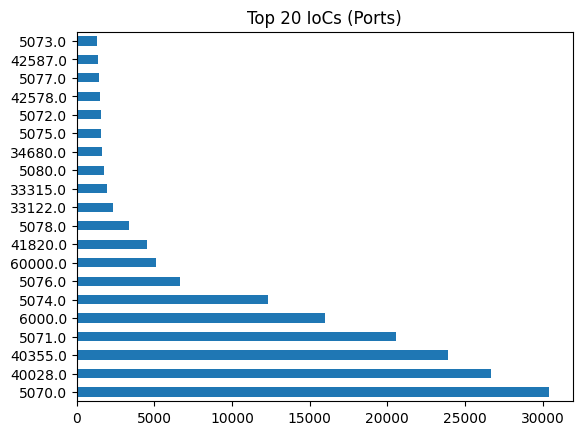

In [43]:
matplotlib.pyplot.title('Top 20 IoCs (Ports)')
sprts.head(20).plot.barh()

<Axes: title={'center': 'Top 20 IoCs (Source IPs)'}>

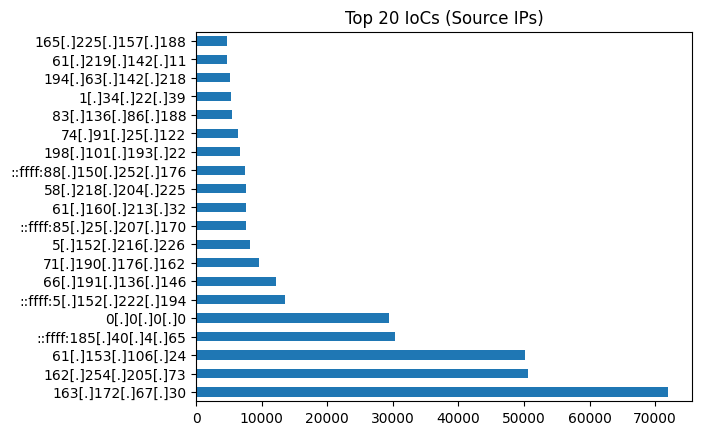

In [53]:
matplotlib.pyplot.title('Top 20 IoCs (Source IPs)')
numberOfAttacksSetWithIps.head(20).plot.barh() # This variable has already include all ips from all attacks.

Since the exact number of occurence is not important in IoC visualization, those are not shown for these graphs. Next section will analyze the victims.

____________________________________________________________________________________________________________________________________________________________
## 6- Victim Countries & Regions Distribution

In this section, with the same algorithm that used for finding top attackers' regions, top victim regions will be analyzed instead.

In [45]:
#Combine remote_host, victimIp and destination_ip columns

victims1 = data_set['victimIP'].value_counts() # For AMUN channel attacks (Other)
victims2 = data_set['local_host'].value_counts() # For DIONAEA channel attacks (Other)
victims3 = data_set['destination_ip'].value_counts() # For SNORT channel attacks (Network)
#No victim ip data in glastopf events.

numberOfVictimsWithIps = victims1.add(victims2, fill_value=0)
numberOfVictimsWithIps = numberOfVictimsWithIps.add(victims3, fill_value=0)
numberOfVictimsWithIps = numberOfVictimsWithIps.sort_values(ascending=False)
SumOfVictimIps = numberOfVictimsWithIps.sum()
numberOfDifferentVictimIps = numberOfVictimsWithIps.__len__()
print("Number of attacks that including victim ip:", SumOfVictimIps)
print("Number of different victim source Ips: ", numberOfDifferentVictimIps)
print("-------")
print(numberOfVictimsWithIps)

Number of attacks that including victim ip: 986943.0
Number of different victim source Ips:  7
-------
162[.]244[.]30[.]100           447932.0
172[.]31[.]13[.]124            216754.0
172[.]31[.]14[.]66             154869.0
::                             111054.0
255[.]255[.]255[.]255           29418.0
::ffff:162[.]244[.]30[.]100     26893.0
                                   23.0
Name: count, dtype: float64


In [46]:
percentagesOfCountries = {}
i = 0

print("\nTop victim regions:\n")

for ipAddress, count in numberOfVictimsWithIps.head(20).items():
    if pandas.notnull(count):
        ipAddress = ipAddress.replace("::ffff:", "")
        ipAddress = ipAddress.replace("[", "")
        ipAddress = ipAddress.replace("]", "")
        url="http://ip-api.com/json/"+ipAddress # ----> Putting ipAddress as endpoint of our API url
        response = get(url)
        responseAsJSON = loads(response.text) 
        try:
            country = responseAsJSON['country'] #---> This gives as the exact country of the IP address.
            region = responseAsJSON['regionName']
        except Exception:
            country = "Null"
            region = "Null"
        strn = country + " (" + region + ")"
        percentageOfAttempts = 100 * numberOfVictimsWithIps.iloc[i] / SumOfVictimIps
        percentageLabel = "{:.2f}".format(percentageOfAttempts) + "%"
        if country not in percentagesOfCountries.keys() and country != "Null" and ipAddress: 
            # adding "and ipAddress:" because some of the IP address data is empty.
            percentagesOfCountries[country] = numberOfVictimsWithIps.iloc[i]
        elif country in percentagesOfCountries.keys() and country != "Null" and ipAddress:
            percentagesOfCountries[country] += numberOfVictimsWithIps.iloc[i]
        print(i+1, "-", ipAddress , " : ", numberOfVictimsWithIps.iloc[i], " of ", SumOfVictimIps, " (" , percentageLabel, ") - ", strn if ipAddress else "")
        i+=1


Top victim regions:

1 - 162.244.30.100  :  447932.0  of  986943.0  ( 45.39% ) -  Canada (Ontario)
2 - 172.31.13.124  :  216754.0  of  986943.0  ( 21.96% ) -  Null (Null)
3 - 172.31.14.66  :  154869.0  of  986943.0  ( 15.69% ) -  Null (Null)
4 - ::  :  111054.0  of  986943.0  ( 11.25% ) -  Null (Null)
5 - 255.255.255.255  :  29418.0  of  986943.0  ( 2.98% ) -  Null (Null)
6 - 162.244.30.100  :  26893.0  of  986943.0  ( 2.72% ) -  Canada (Ontario)
7 -   :  23.0  of  986943.0  ( 0.00% ) -  


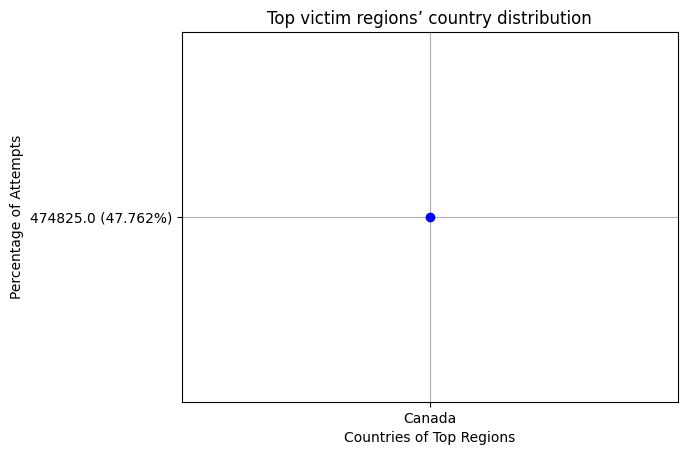

In [47]:
#Get dictionary elements as list
percentagesOfCountries = dict(sorted(percentagesOfCountries.items(), key=lambda item: item[1], reverse=True))
countryCodes = list(percentagesOfCountries.keys())
attempts = list(percentagesOfCountries.values())
countryPercentages = []
countryAttempts = []

#Get percentages for each country
for i in attempts:
    percentage = 100 * i / totalNumberOfAttackerIPOccs
    countryPercentages.append(percentage)
    countryAttempts.append(i)
    
# Sort the lists for any case
countryAttempts.sort(reverse=True)
countryPercentages.sort(reverse =True)

#Unite them as one
countryAttemptsAndPercentages = []

for i in range(min(len(countryAttempts), len(countryPercentages))):
    countryAttemptAndPercentage = str(countryAttempts[i]) + " (" + "{:.3f}".format(countryPercentages[i]) + "%)"
    countryAttemptsAndPercentages.append(countryAttemptAndPercentage)

matplotlib.pyplot.plot(countryCodes, countryAttemptsAndPercentages, marker='o', linestyle='-', color='b')
matplotlib.pyplot.title("Top victim regions’ country distribution")
matplotlib.pyplot.xlabel("Countries of Top Regions")
matplotlib.pyplot.ylabel("Percentage of Attempts")
matplotlib.pyplot.grid(True)
matplotlib.pyplot.gca().invert_yaxis()
matplotlib.pyplot.gca().invert_xaxis()
matplotlib.pyplot.show()

48% of the victims are from Canada, and the remaining victim locations (52% of victims) are unknown.

____________________________________________________________________________________________________________________________________________________________
## Conclusion

In the data analysis part of the work, the honeypot dataset that containing approximately 1 million data of cyberattacks without payload was analyzed with Pandas library of Python programming language. In the analysis, the attacks were defined and analyzed with the available data, the distribution of the leading attackers and leading victims in the world was analyzed, time analysis of attacks have conducted, methods of the attackers were examined, and the strong IoCs of the dataset were shared. According to the results, attackers mostly located on the United States and victims mostly located on Canada, and many different attacks occured between last quarter of 2014 and first quarter of 2017 that consist of various parameters.

Security Information and Event Management - Bournemouth University - s5636549
